<a href="https://colab.research.google.com/github/joshuajhchoi/ai2learn/blob/master/titanic_tutorial_for_beginners_in_kr_en_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic Challenge

## 1. Import libraries & data  데이터준비 및 모듈 임포트

In [0]:
# They are for data manipulation/ 기본 데이터 정리 및 처리
import pandas as pd
import numpy as np

# For Visualization / 시각화
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn-whitegrid')
import missingno

# For preprocessing and ML algorithms / 전처리 및 머신 러닝 알고리즘
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier

# Tunning and Evaluation / 모델 튜닝 및 평가
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn import model_selection

# Ignore warnings / 경고 제거 (Pandas often makes warnings)
import sys
import warnings

import warnings
warnings.filterwarnings('ignore')

### CSV to DF

import modules -> import data -> turning data into data frame (pandas) 

* 이어서 이를 데이터프레임에 임포트하여 데이터셋이 판다스 데이터프레임에 임포트 되도록 합니다.
* Import the data into the dataframe so the dataset is converted as a pandas dataframe.

In [0]:
# This may be harder than expected for a firsttimer, but if the data was not delivered correctly from the copy, press "+ Add Data", load "Titanic Data" from "Competition Data", and click each file to check the path address.
# 이 것이 처음하는 사람에게 예상보다 어려울 수 있는데 복사한 것에서 데이터가 전달이 잘 안 되었다면 "+Add Data" 누르시고 'Competition Data'에서 "Titanic Data" 불러온 후 파일을 찍어서 경로 주소 확인해야 함 
test = pd.read_csv('../input/titanic/test.csv')
train = pd.read_csv('../input/titanic/train.csv')

# Now csv files, test and train, have become data frames.    

### Basic operations with dataframes

`head()` shows first five rows

In [0]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


`tail()` shows last five rows

In [0]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


`describe()` shows basic statistics for columns. By default it shows information only about continuous features. You can see information about all features by setting `include='all'`

In [0]:
train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Richards, Mrs. Sidney (Emily Hocking)",male,NaN,NaN,NaN,CA. 2343,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


`dtypes` shows types of all columns

In [0]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

`info()` is an advanced version of `dtypes` which shows not only types, but also the number of non-null values.

In [0]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


`columns` shows the list of all columns in dataframe

In [0]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

You can slice the list of columns like a usual python list object

In [0]:
train.columns[3], train.columns[3:5]

('Name', Index(['Name', 'Sex'], dtype='object'))

You can select several rows of dataframe by indexing

In [0]:
train[5:20]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S


`shape` shows number of rows and number of columns

In [0]:
train.shape

(891, 12)

## 2. 파일 분리 및 병합 (File Separations and Merges) 

* Secure the shape of ntrain and ntest. (Preparation for later splitting from the merged one)
* y_train is a known result.
* Separate the passenger ID of the test as it will be added to the final result later.
* Merge train and test to create a file called data. When you convert a string to a number, or group numbers by interval, it is easier for us to put them together to do it all at once.
* ntrain과 ntest의 shape을 확보해놓습니다. (병합 한 것을 나중에 다시 갈라 놓기 위한 준비)
* y_train은 알려진 결과 값이니 따로 모셔 놓고
* 테스트의 승객 아이디는 나중에 최종 결과에 넣을 것이기 때문에 따로 떼어 놓습니다.
* train과 test를 병합하여 data 란 파일을 만듭니다. 문자로 된 것을 숫자로 바꾼다든가.숫자를 인터발 별로 그룹화 한다든가 할 때 한꺼번에 하기 위해 합해 놓습니다.

In [0]:
# 병합 준비
ntrain = train.shape[0]
ntest = test.shape[0]

# 아래는 따로 잘 모셔 둡니다.
y_train = train['Survived'].values
passId = test['PassengerId']

# 병함 파일 만들기
data = pd.concat((train, test))

# 데이터 행과 열의 크기는
print("data size is: {}".format(data.shape))

data size is: (1309, 12)


In [0]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

We can see that 342 people survived and 549 didn't survive

## 3. Check the files / 파일을 보겠습니다.

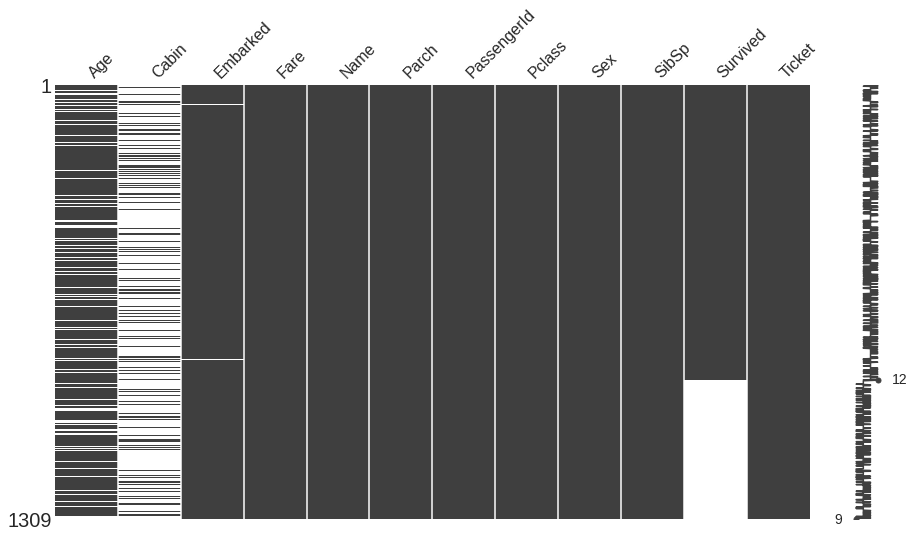

In [0]:
missingno.matrix(data, figsize = (15,8))

This plot shows missing values in each column and in each row. Note that in the lower half of `Survived` column all the values are missing. This is because these rows are from test data.

In [0]:
data.isnull().sum() #비어 있는 값들을 체크해 본다.

Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

In [0]:
data.Age.isnull().any()

True

* Names of columns / 열 이름을 보겠습니다.

In [0]:
data.columns

Index(['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId',
       'Pclass', 'Sex', 'SibSp', 'Survived', 'Ticket'],
      dtype='object')

## 4. Features 항목

#### 항목의 종류 There are many types of features.
* 범주형 항목 (Categorical Features)

범주형 변수는 둘 이상의 결과 요소가 있는 변수이며 해당 기능의 각 값을 범주별로 분류 할 수 있습니다. 예를 들어 성별은 두 가지 범주 (남성과 여성)의 범주 형 변수입니다. 이산형 변수(discrete variable) = 범주형 변수 (categorical variable) 의 하나로 명목 변수 norminal variable 라고도합니다.

Categorical variables are variables that have more than one result element, and each value of that function can be classified by category. For example, gender is a categorical variable in two categories (male and female). Discrete variable = It is one kind of categorical variable, and is also known as nominal variable .

* 데이터 셋에서 명목 항목 : Sex, Embark 이며 우리는 Name, Ticket 등을 이로 변환해야 할 것 같습니다. The nominal items in the data set are: Sex, Embark and we have to convert Name, Ticket, etc to numbers.

* Ordinal Variable :

순위 변수는 범주 형의 하나지만 그 차이점은 값 사이의 상대 순서(=서열) 또는 정렬이 가능하다는 것입니다.

Ordinal variables are one of the categorical types, but the difference is the relative order (= sequence) or sorting between the values.

데이터 셋에서 순위 항목 : PClass 이며 우리는 Cabin을 이 범주로 변환해서 사용해야 할 것 같습니다.

Ordinal variables in the data set: PClass and we think we should convert Cabin to this category.

* 연속형 항목 (Continuous Features):

서로 연속된 값을 가진 변수를 가진 항목이며 여기에서 우리는 연령을 대표적인 것으로 볼 수 있습니다.

This is an item with variables with continuous values, age is one good sample

Age, SipSp, Parch, Fare는 interval variable로 만들어 이에 적용해야 할 것 같습니다.

Age, SipSp, Parch, and Fare should be catgorized to the interval variable.

* Feature Information

          Variable        Definition                Key

          survival          Survival                    0 = No, 1 = Yes

          pclass          Ticket class                1 = 1st, 2 = 2nd, 3 = 3rd

          sex              Sex    

          Age              Age in years    

          sibsp              # of siblings / spouses aboard the Titanic    

          parch              # of parents / children aboard the Titanic    

          ticket          Ticket number    

          fare              Passenger fare    

          cabin              Cabin number    

          embarked          Port of Embarkation         C = Cherbourg, Q = Queenstown, S = Southampton

## 5. 데이터 탐구  Exploratory Data Analysis

* train파일 순서대로 데이터 파일의 열들을 봅니다. 
* Let's view the columns of the data file in the order in the train file.

![](https://1.bp.blogspot.com/-rBTabaGeOTo/XicYRmv9s7I/AAAAAAAAKts/WQDUpGJbv20xbAO8vfnOkqtbCHyme3zNQCLcBGAsYHQ/s640/grey%2Barea.png)

In [0]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


* 파일 각 열의 상관 관계를 보겠습니다.

Let's take a look at the correlation of each column in the file.

Co-relation 매트릭스는 seaborn에서 변수 간 상관 계수를 보여주는 표입니다. 표의 각 셀은 두 변수 간의 상관 관계를 보여줍니다. 상관 매트릭스는 고급 분석에 대한 입력 및 고급 분석에 대한 진단으로 데이터를 요약하는 데 사용됩니다. 참고: https://seaborn.pydata.org/examples/many_pairwise_correlations.html

Co-relation matrix is a table showing the correlation coefficient between variables in seaborn. Each cell in the table shows a correlation between two variables. Correlation matrices are used to summarize data as input to advanced analysis and as diagnostics for advanced analysis. Note: https://seaborn.pydata.org/examples/many_pairwise_correlations.html

아래 마스크 셋업은 0로 행렬을 상관 행렬과 같은 모양으로 만든 후 여기에 불리안 값을 넣고 이를 다시 True만 만듭니다.

The mask setup below makes a matrix that looks like a correlation matrix with zeros, then puts a Boolean value into it and makes it true.

triu 는 우측 상단 삼각행렬을 의미

triu means upper right triangle

annot= True는 각 셀에 숫자를 표시하라는 것이고, False는 하지 말라는 것이구요

annot = True means to display a number in each cell, False means oppposite. https://seaborn.pydata.org/generated/seaborn.heatmap.html

이어서 이를 heatmap으로 런칭합니다.

Then launch it as a heatmap.

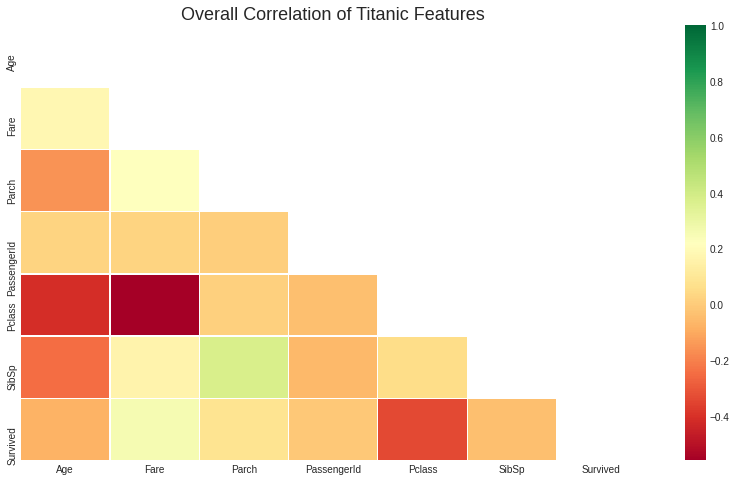

In [0]:
# Co-relation 매트릭스
corr = data.corr()
# 마스크 셋업
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# 그래프 셋업
plt.figure(figsize=(14, 8))
# 그래프 타이틀
plt.title('Overall Correlation of Titanic Features', fontsize=18)
#  Co-relation 매트릭스 런칭
sns.heatmap(corr, mask=mask, annot=False,cmap='RdYlGn', linewidths=0.2, annot_kws={'size':20})
plt.show()

* "Surived" 분석

한 열씩 검토해 보겠습니다.

We will look at the columns one by one

Survived - Key: (0 - Not Survived, 1- Survived)

Survived는 수자로 값을 주지만 Categorical Variable인 셈입니다.

죽던지 살던지 둘 중 하나의 값을 줍니다.

countplot을 그려 봅니다.

사이즈는 가로 10인치 세로 2인치

생존 여부 0과 1의 숫자를 세어 본 후 그림을 그리도록 명령을 하는 것입니다.

pyplot(plt)의 figure라는 메소드를 써서 그림판의 크기를 정하고, seaborn의 카운트플롯을 그리라는 것입니다.

"Survived" gives a number, but it's a categorical variable.

Either Survived or Not Survived

Draw a countplot.

Size is 10 inches wide by 2 inches long

Survival counts

Use pyplot (plt) figure method to size the paint and draw a seaborn count plot.

0    549
1    342
Name: Survived, dtype: int64


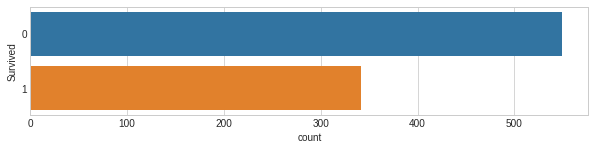

In [0]:
fig = plt.figure(figsize=(10,2))
sns.countplot(y='Survived', data=train)
print(train.Survived.value_counts())

* 불행히도 사망자가 훨씬 많아 보입니다.
* 전체 사망자 비율을 좀 보겠습니다.
 
* Unfortunately, there are more deaths than "survived".
 
* Let's take a look at the overall rate.
* 파이그래프랑 카운트 플롯을 서브플롯으로 그립니다.
* 행은 하나 열은 2개의 서브 플롯입니다. 사이즈는 가로 15인치 세로 6인치
* 'Survived'의 값을 카운트해서 파이플롯을 만듭니다.
* explode는 폭발하는 것이니까 1이면 튀어 나가는 것인데 0을 주면 분리만 되고 돌출은 되지 않습니다. 이어서 0, 1인 것은 첫 번째 것은 아니고 두번 째 것은 분리된다는 의미로 생각하시면 됩니다.
* autopercent는 1.1이 표현하는 부분은 소수점 한 자리까지 보여 주라는 의미입니다. 뒤에 점 이하가 4면 둘 다 소수점 4자리수 까지 보여 줍니다.
* ax[0]은 첫번째 칸입니다.
* set_title 메소드는 서브 플롯의 제목을 보여 줍니다.
 
* Draw a pie chart and count plot in the subplot parts.
 
* Two rows and one column. Size : 15 inches wide by 6 inches high
* Create a pieplot by counting the value of 'Survived'.
* Explode means "protrusion", so if it's 1, it's popping out. 0 and 1 means that the second one is poping out.
* Autopercent means 1.1 shows up to one decimal place. If there is 4 after the dot, both show up to four decimal places.
* ax [0] is the first cell.
* The set_title method displays the title of the subplot.

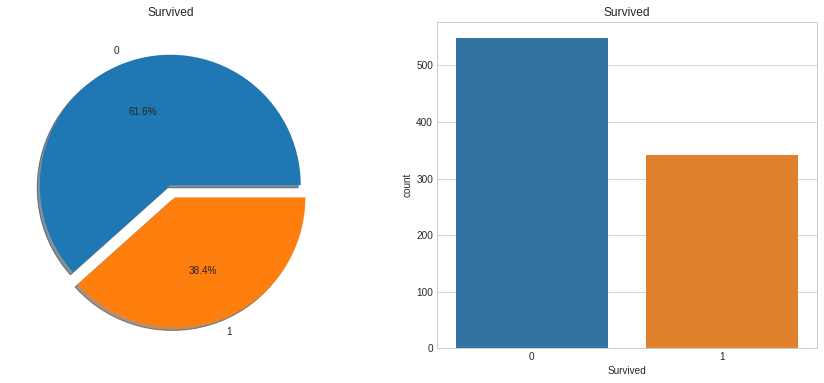

In [0]:
f,ax=plt.subplots(1, 2, figsize=(15, 6))
train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data=train, ax=ax[1])
ax[1].set_title('Survived')
plt.show()

* 위의 것을 아래와 같이 함수로 만들겠습니다. (물론 자주 쓰이지는 않겠지만 연습이니)
* Let's make the above as a function. (it's not going to be used often, but it's a practice for making a function)

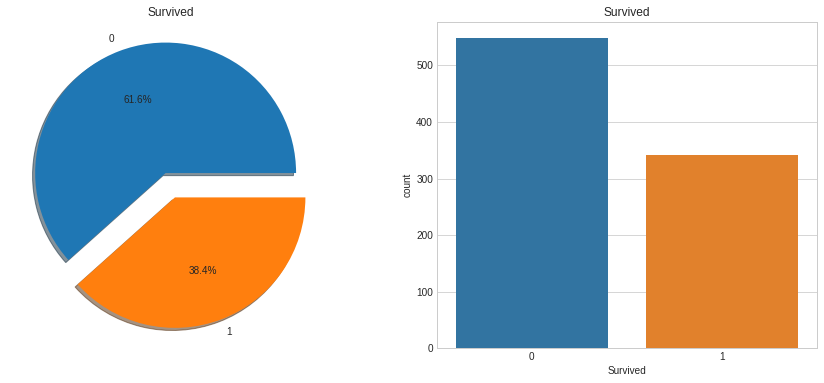

In [0]:
def piecount(col):
    f, ax = plt.subplots(1, 2, figsize=(15, 6))
    train[col].value_counts().plot.pie(explode=[0.1 for i in range(train[col].nunique())], autopct='%1.1f%%', ax=ax[0], shadow=True)
    ax[0].set_title(col)
    ax[0].set_ylabel('')
    sns.countplot(col, data=train, ax=ax[1])
    ax[1].set_title(col)
    plt.show()

piecount('Survived')

This function works for features with any number of categories

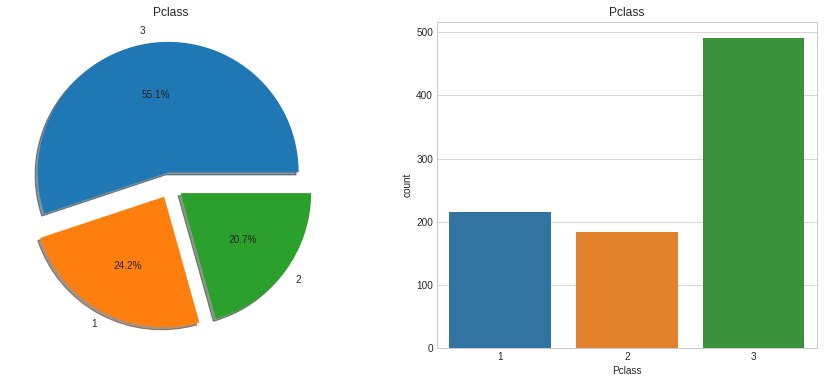

In [0]:
piecount("Pclass")

* "Pclass" 분석

* Pclass는 값이 숫자이나 서열이 정해진 Ordinal Feature이다.
* Pclass is an "Ordinal Feature" whose values are numerical but sequenced.
* Key:1 = 1st, 2= 2nd, 3 = 3rd
* 
* 각 클래스 당 생존자를 보겠습니다.
* * Let's look at the survivors for each class.

In [0]:
train.groupby(['Pclass','Survived'])['Survived'].count()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

In [0]:
pd.crosstab(train.Pclass, train.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


* 1등급 객실의 사람들은 생존자가 더 많고, 2등급은 생존자에 비해 사망자가 조금 더 많으나, 3등급은 사망자가 3배 이상 많다는 것을 알 수 있습니다.
* The 1st class cabin has more survivors, the 2nd class has a few more deaths than the survivors, but the 3rd class has three times more deaths.

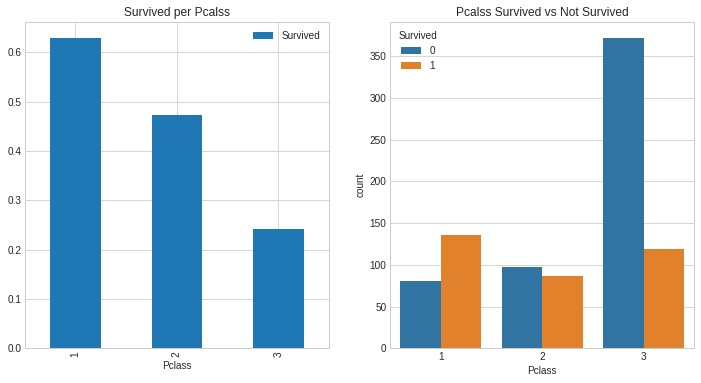

In [0]:
f, ax = plt.subplots(1, 2, figsize=(12, 6))
train[['Pclass','Survived']].groupby(['Pclass']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived per Pcalss')
sns.countplot('Pclass', hue='Survived', data=train, ax=ax[1])
ax[1].set_title('Pcalss Survived vs Not Survived')
plt.show()

* 위에 만든 함수를 한 번 써 먹어 볼까요?
* Let's use a function we made above.

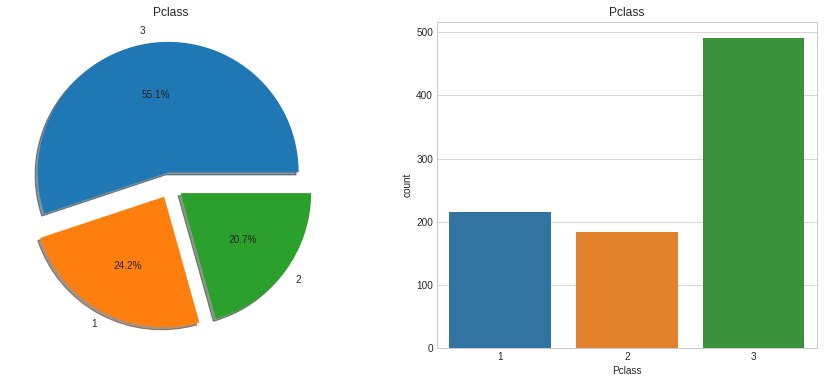

In [0]:
piecount("Pclass")

* %는 3등칸이 반이 넘으나 위의 그래프에서 생존자는 1등석이 가장 많다는 것을 알 수 있습니다.
* 각 클래스 당 생존률을 볼까요?

### "Name" 분석
* 이름은 거의 모두 다를 가능성이 큽니다. Family Name, First Name, Middle Name and even Dr. Capt, master and so on 모두 감안하면...
* 분류를 한 번 해 봅니다.
* 리스트를 한 번 주 욱 보겠습니다.
* The names are most likely different...all of them . Family Name, First Name, Middle Name and even Dr. Given Capt, Master and so on ...
* Try to classify them.
* Let's look at the list once.

In [0]:
data.Name.value_counts()

Kelly, Mr. James                         2
Connolly, Miss. Kate                     2
Montvila, Rev. Juozas                    1
Lemberopolous, Mr. Peter L               1
Fortune, Mrs. Mark (Mary McDougald)      1
                                        ..
Allison, Master. Hudson Trevor           1
Earnshaw, Mrs. Boulton (Olive Potter)    1
Storey, Mr. Thomas                       1
Doharr, Mr. Tannous                      1
Hirvonen, Miss. Hildur E                 1
Name: Name, Length: 1307, dtype: int64

* 이름은 언뜻 보아서 감이 안 옵니다. 중간에 있는 Mr. 같은 호칭을 볼까요.
* ['Initial']이란 열을 새로 만들어서 여기에 Name에서 추출한 Regular Expression을 넣습니다.
* 아래에서 str.extract('([A-Za-z]+).')부분은 str에서 대문자 A~Z, 소문자 a~z 중에 . 명령을 통해 .으로 끝나는 부분을 추출해 내는 것입니다.
* ('^([A-Za-z]+)')으로 하면 처음에 나오는 문자 덩어리가 될 것이고 +를 빼면 첫 스펠링 한캐릭터만 추출합니다.
 
* The name doesn't seem to have any meaning at first glance.
 
* Create a new column called ['Initial'] and put the regular expressions extracted from Name.
* The str.extract ('([A-Za-z] +) .') Part of the lower part of the str is the . Is to extract the part that ends with.
* ('^ ([A-Za-z] +)') will be the first chunk of characters, and minus + will extract only the first spelled character.

* 안전을 위해 카피를 하나 만들어서 새로운 항목을 만들어 봅니다.
* Just in case, let's make a copy of the df and make new features on it.

In [0]:
temp = data.copy()
temp['Initial'] = 0
temp['Initial'] = data.Name.str.extract('([A-Za-z]+)\.')

We can see that several titles are common, but most of them are rare.

In [0]:
temp['Initial'].value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Major         2
Ms            2
Don           1
Dona          1
Sir           1
Capt          1
Lady          1
Jonkheer      1
Mme           1
Countess      1
Name: Initial, dtype: int64

이를 성별로 봅니다.
View it by gender.

In [0]:
pd.crosstab(temp.Initial, temp.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dona,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,1,0,1,0,0,260,2,1,0,197,2,0,0
male,1,4,0,1,0,7,1,0,2,61,0,0,0,757,0,0,8,1


* 생존률로 봅니다.
* by survival percentage

In [0]:
def survpct(col):
    return temp.groupby(col)['Survived'].mean()

survpct('Initial')

Initial
Capt        0.000000
Col         0.500000
Countess    1.000000
Don         0.000000
Dona             NaN
Dr          0.428571
Jonkheer    0.000000
Lady        1.000000
Major       0.500000
Master      0.575000
Miss        0.697802
Mlle        1.000000
Mme         1.000000
Mr          0.156673
Mrs         0.792000
Ms          1.000000
Rev         0.000000
Sir         1.000000
Name: Survived, dtype: float64

* 생존 숫자로 봅니다.
* by number

* test 에 있는 Dona의 나이를 보고 어디에 넣을지 보겠습니다.
* Ms. 는 현대처럼 Miss + Mrs를 합친 말이 아니라 당시에는 귀족미망인을 의미하는 것이 었습니다. Mlle나 Mme등도 마드모아젤과 마담의 줄인말일 경우일 것입니다. 귀족 여성들로 보아야겠죠.
 
* Let's look at Dona's age and decide to where to classify her.
  
* Ms. did not mean Miss + Mrs combined like these days, at the time it meant widow. Also Mlle, & Mme may be short for Mademoiselle and Madame. I should see them as women in a higher class.

In [0]:
temp['LastName'] = data.Name.str.extract('([A-Za-z]+)')

In [0]:
pd.crosstab(temp.LastName, temp.Survived).T.style.background_gradient(cmap='summer_r')

LastName,Abbing,Abbott,Abelson,Adahl,Adams,Ahlin,Aks,Albimona,Alexander,Alhomaki,Ali,Allen,Allison,Allum,Andersen,Anderson,Andersson,Andreasson,Andrew,Andrews,Angle,Appleton,Arnold,Artagaveytia,Asim,Asplund,Astor,Attalah,Aubart,Augustsson,Ayoub,Backstrom,Baclini,Badt,Bailey,Balkic,Ball,Banfield,Barah,Barbara,Barber,Barkworth,Barton,Bateman,Baumann,Baxter,Bazzani,Beane,Beavan,Becker,Beckwith,Beesley,Behr,Bengtsson,Berglund,Berriman,Betros,Bidois,Bing,Birkeland,Bishop,Bissette,Bjornstrom,Blackwell,Blank,Bonnell,Bostandyeff,Boulos,Bourke,Bowen,Bowerman,Bracken,Bradley,Braund,Brewe,Brocklebank,Brown,Bryhl,Burke,Burns,Buss,Butler,Butt,Byles,Bystrom,Cacic,Cairns,Calderhead,Caldwell,Calic,Cameron,Campbell,Canavan,Cann,Caram,Carbines,Cardeza,Carlsson,Carr,Carrau,Carter,Cavendish,Celotti,Chaffee,Chambers,Chapman,Charters,Cherry,Chibnall,Chip,Christmann,Christy,Chronopoulos,Clarke,Cleaver,Clifford,Coelho,Cohen,Coleff,Coleridge,Collander,Colley,Collyer,Compton,Connaghton,Connolly,Connors,Cook,Cor,Corn,Coutts,Coxon,Crease,Cribb,Crosby,Culumovic,Cumings,Cunningham,Dahl,Dahlberg,Dakic,Daly,Danbom,Daniel,Danoff,Dantcheff,Davidson,Davies,Davis,Davison,Dean,Denkoff,Dennis,Devaney,Dick,Dimic,Dodge,Doharr,Doling,Dooley,Dorking,Douglas,Dowdell,Downton,Drazenoic,Drew,Duane,Duff,Duran,Edvardsson,Eitemiller,Eklund,Ekstrom,Elias,Elsbury,Emanuel,Emir,Endres,Eustis,Fahlstrom,Farrell,Farthing,Faunthorpe,Fischer,Fleming,Flynn,Foo,Ford,Foreman,Fortune,Fox,Francatelli,Frauenthal,Frolicher,Frost,Fry,Funk,Futrelle,Fynney,Gale,Gallagher,Garfirth,Garside,Gaskell,Gavey,Gee,Gheorgheff,Giglio,Giles,Gilinski,Gill,Gillespie,Gilnagh,Givard,Glynn,Goldenberg,Goldschmidt,Goldsmith,Goncalves,Goodwin,Graham,Green,Greenberg,Greenfield,Gronnestad,Guggenheim,Gustafsson,Haas,Hagland,Hakkarainen,Hale,Hamalainen,Hampe,Hanna,Hansen,Harder,Harknett,Harmer,Harper,Harrington,Harris,Harrison,Hart,Hassab,Hassan,Hawksford,Hays,Healy,Hedman,Hegarty,Heikkinen,Heininen,Hendekovic,Henry,Herman,Hewlett,Hickman,Hippach,Hirvonen,Hocking,Hodges,Hogeboom,Hold,Holm,Holverson,Homer,Honkanen,Hood,Horgan,Hosono,Hoyt,Humblen,Hunt,Ibrahim,Icard,Ilett,Ilmakangas,Isham,Ivanoff,Jacobsohn,Jalsevac,Jansson,Jardin,Jarvis,Jenkin,Jensen,Jermyn,Jerwan,Johannesen,Johanson,Johansson,Johnson,Johnston,Jonkoff,Jonsson,Jussila,Kallio,Kalvik,Kantor,Karaic,Karlsson,Karun,Kassem,Keane,Keefe,Kelly,Kent,Kenyon,Kiernan,Kilgannon,Kimball,Kink,Kirkland,Klaber,Klasen,Knight,Kraeff,Kvillner,Lahoud,Lahtinen,Laitinen,Laleff,Lam,Landergren,Lang,Laroche,Larsson,LeRoy,Leader,Leeni,Lefebre,Lehmann,Leinonen,Leitch,Lemberopolous,Lemore,Lennon,Leonard,Lester,Lesurer,Levy,Lewy,Leyson,Lievens,Lindahl,Lindblom,Lindell,Lindqvist,Lines,Ling,Lobb,Long,Longley,Louch,Lovell,Lulic,Lundahl,Lurette,Mack,Madigan,Madill,Madsen,Maenpaa,Maioni,Maisner,Mallet,Mamee,Mangan,Mannion,Marechal,Markoff,Markun,Marvin,Masselmani,Matthews,Mayne,McCarthy,McCormack,McCoy,McDermott,McEvoy,McGough,McGovern,McGowan,McKane,McMahon,McNamee,Meanwell,Meek,Mellinger,Mellors,Meo,Mernagh,Meyer,Millet,Milling,Minahan,Mineff,Mionoff,Mitchell,Mitkoff,Mockler,Moen,Molson,Montvila,Moor,Moore,Moran,Moraweck,Morley,Morrow


* 이제 우리는 Initial에서 Mr.등의 호칭을 뽑아내었고, 성을 뽑아내었습니다.
* Now we have extracted salutations in 'Initial' and last names in 'LastName'

* 머신이 알파벳보다는 숫자를 좋아 하므로 숫자로 바꿉니다.
* Since our machine prefers numbers over alphabets, we change them to numbers.

* 아, 그러기 전에 Dona를 처리해야지요.
* But we have to take care of Dona first.

In [0]:
temp.loc[temp['Initial'] == 'Dona']

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Initial,LastName
414,39.0,C105,C,108.9,"Oliva y Ocana, Dona. Fermina",0,1306,1,female,0,NaN,PC 17758,Dona,Oliva


* 나이로 추측해서 Mrs.로 넣습니다.
* Let me guess she is Mrs. based on her age.

In [0]:
temp.loc[temp['Initial'] == 'Dona', 'Initial'] = 'Mrs'

In [0]:
pd.crosstab(temp.Initial, temp.Survived).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Survived,,,,,,,,,,,,,,,,,
0.0,1,1,0,1,4,1,0,1,17,55,0,0,436,26,0,6,0
1.0,0,1,1,0,3,0,1,1,23,127,2,1,81,99,1,0,1


* Last name 은 전부 숫자로 바꿉니다.
* Let's change the Last Names to numbers.

In [0]:
temp['NumName'] = temp['LastName'].factorize()[0]

In [0]:
pd.crosstab(temp.NumName, temp.Survived).T.style.background_gradient(cmap='summer_r')

NumName,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439


In [0]:
temp.loc[temp['LastName'] == 'Ali']

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Initial,LastName,NumName
210,24.0,NaN,S,7.05,"Ali, Mr. Ahmed",0,211,3,male,0,0.0,SOTON/O.Q. 3101311,Mr,Ali,182
784,25.0,NaN,S,7.05,"Ali, Mr. William",0,785,3,male,0,0.0,SOTON/O.Q. 3101312,Mr,Ali,182


* 보시다시피 같은 Last name에 같은 번호가 쓰여졌다.
* As you see NumnName is the same as their Last Names are the same.
* The part at the end: [0] means you are only taking the labels, throwing away the uniques that map back to your input.
* 끝에 [0]은 라벨만 보고 번호를 붙이는 것으로 정말 unique한 것이란 것은 안 본다는 것입니다.


* We have turned 'Initial' & 'NumName' representing "Name" and "Last Name" into numbers. Let's move on.
* 자 이제 이름을 의미하는 중요한 요소 두 개를 숫자로 바꾸었으니 다음으로 갑니다.

### "Sex" 분석

* 함수를 만들어서 train파일을 보지요
* Let's see the graph Survived / Sex

In [0]:
train[['Sex','Survived']].groupby(['Sex']).mean()

,Survived
Sex,
female,0.742038
male,0.188908


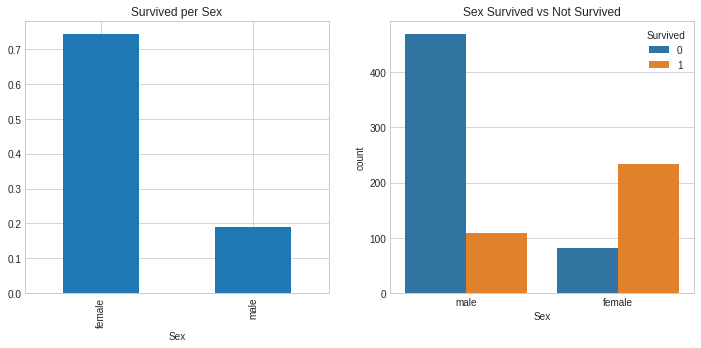

In [0]:
def bag(col, target, title, title1):
    f,ax=plt.subplots(1,2,figsize=(12,5))
    train.groupby([col])[target].mean().plot(kind='bar', ax=ax[0])
    ax[0].set_title(title)
    sns.countplot(col, hue=target, data=train, ax=ax[1])
    ax[1].set_title(title1)
    plt.show()

bag('Sex','Survived','Survived per Sex','Sex Survived vs Not Survived')

* 배에 있던 남자의 수는 여자의 수보다 훨씬 많습니다. 여전히 생존 여성 수는 남성 수의 거의 두 배입니다. 선박 여성의 생존율은 약 75 % 인 반면 남성의 생존율은 약 18-19 %입니다.
* The number of men on the ship is much more than the number of women. Still, the number of surviving women is almost twice that of men. The survival rate of ship women is about 75%, while the survival rate of men is about 18-19%.
* 이 것은 남성/여성을 1,2로 나누면 될 것 같은 뻔해 보이는 것이지만 좀 더 새분화하면 좋아 보입니다.
* 예를 들어 아기들은 아기이지, 남자인지 여자인지 구명보트 태울 때 안 물어 볼 것이기 때문입니다.
* 오히려 (불행하게도) 귀족 아기인지 서민의 아기인지는 행과불행을 가를 수 있습니다 ㅠㅠ
* 생존 Pclass별로 성별을 봅니다.
* This seems obvious to divide males / females by 1,2, but it looks good if you break it down a bit.
* For example, babies are just babies and would not be matter whether it is boy or girl.
* (Unfortunately) whether you are a baby in a higher social class or one from a humble family, it might have mattered.
* View gender by survival Pclass.

In [0]:
pd.crosstab([train.Sex, train.Survived],train.Pclass,margins=True).style.background_gradient(cmap='summer_r')

* 사회는 불공평 했으나 최소한 남자들의 신사도는 있었다고 할 수 있을 것 같습니다.
* The society was unfair but gentlemenship worked there.

### Age 분석
 
* Age는 Continuous한 값입니다.
* 빈칸이 많아서 빈칸처리가 결정적인 역할을 할 것 같습니다.
 
* Age의 최대, 최소, 중간을 보겠습니다.
 
* Age is a continuous value.
 
* Because there are a lot of blanks, blank processing seems to play a decisive role.
 
* Let's take a look at the maximum, minimum, and middle of Age.

In [0]:
print('Oldest Passenger was', data['Age'].max(), 'Years')
print('Youngest Passenger was', data['Age'].min(), 'Years')
print('Average Age on the ship was', int(data['Age'].mean()), 'Years')

Oldest Passenger was 80.0 Years
Youngest Passenger was 0.17 Years
Average Age on the ship was 29 Years


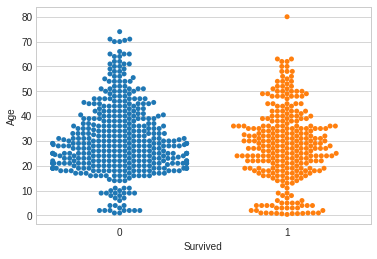

In [0]:
sns.swarmplot(x=train['Survived'], y=train['Age'])
plt.xlabel("Survived")
plt.ylabel("Age")
plt.show()

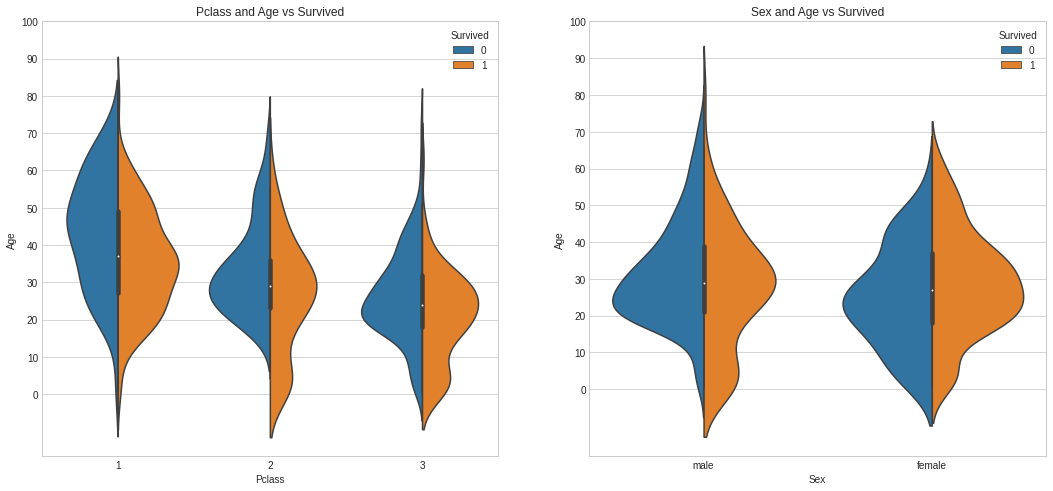

In [0]:
f, ax = plt.subplots(1,2,figsize=(18,8))
sns.violinplot("Pclass", "Age", hue="Survived", data=train, split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))
sns.violinplot("Sex","Age", hue="Survived", data=train, split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))
plt.show()

#### 관찰 :

1) Pclass에 따라 어린이 수가 증가하고 10 세 미만의 어린이 (즉, 어린이)의 생존율은 Pclass에 상관없이 양호해 보입니다.

2) Pclass1에서 20-50세의 Passeneger의 생존 가능성은 높고 여성에게는 더 좋습니다.

3) 남성의 경우 생존 확률은 나이가 증가함에 따라 감소합니다.

#### observation :

1) The number of children increases with Pclass, and the survival rate for children under 10 years old (i.e. children) looks good regardless of Pclass.

2) Passeneger, 20-50 years old, in Pclass1 has a higher chance of survival and is better for women.

3) In men, the probability of survival decreases with age.

우선 age의 빈칸 부터 해결 합니다.

First, resolve the issue of null values of age.

앞에서 살펴본 것처럼 Age 항목에는 177 null 값이 있습니다. 이러한 NaN 값을 대체하기 위해 데이터 집합의 평균 수명을 지정할 수 있습니다.

그러나 문제는 평균 연령이 29 세를 4세 아이에게 할당 할 수 없습니다. 승객이 어떤 연령대에 있는지 알 수있는 방법이 있을까요? 이름에서 힌트를 찾아 봅니다.

As we saw earlier, the Age item has a 177 null values. To replace these NaN values, you can specify the average age of the dataset.

But the problem is that the average age is 29 years old can not be assigned this to a kid. Is there any other way ? Look for some hints in their names.

* 그리고 Initial 별 평균 연령을 보고 Age에 적용 시키는 것이 좋을 것 같습니다.
* And it is better to see the average age by Initial and apply it to Age.

In [0]:
temp.groupby('Initial').agg({'Age': ['mean', 'count']}) #이니셜 별 평균 연령 체크

Age      
               mean count
Initial                  
Capt      70.000000     1
Col       54.000000     4
Countess  33.000000     1
Don       40.000000     1
Dr        43.571429     7
Jonkheer  38.000000     1
Lady      48.000000     1
Major     48.500000     2
Master     5.482642    53
Miss      21.774238   210
Mlle      24.000000     2
Mme       24.000000     1
Mr        32.252151   581
Mrs       37.005848   171
Ms        28.000000     1
Rev       41.250000     8
Sir       49.000000     1

In [0]:
# Assining NaN Age items with mean value of Initials
temp = temp.reset_index(drop=True)

temp['Age'] = temp.groupby('Initial')['Age'].apply(lambda x: x.fillna(x.mean()))

temp[31:50]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Initial,LastName,NumName
31,37.005848,B78,C,146.5208,"Spencer, Mrs. William Augustus (Marie Eugenie)",0,32,1,female,1,1.0,PC 17569,Mrs,Spencer,30
32,21.774238,NaN,Q,7.7500,"Glynn, Miss. Mary Agatha",0,33,3,female,0,1.0,335677,Miss,Glynn,31
33,66.000000,NaN,S,10.5000,"Wheadon, Mr. Edward H",0,34,2,male,0,0.0,C.A. 24579,Mr,Wheadon,32
34,28.000000,NaN,C,82.1708,"Meyer, Mr. Edgar Joseph",0,35,1,male,1,0.0,PC 17604,Mr,Meyer,33
35,42.000000,NaN,S,52.0000,"Holverson, Mr. Alexander Oskar",0,36,1,male,1,0.0,113789,Mr,Holverson,34
36,32.252151,NaN,C,7.2292,"Mamee, Mr. Hanna",0,37,3,male,0,1.0,2677,Mr,Mamee,35
37,21.000000,NaN,S,8.0500,"Cann, Mr. Ernest Charles",0,38,3,male,0,0.0,A./5. 2152,Mr,Cann,36
38,18.000000,NaN,S,18.0000,"Vander Planke, Miss. Augusta Maria",0,39,3,female,2,0.0,345764,Miss,Vander,18
39,14.000000,NaN,C,11.2417,"Nicola-Yarred, Miss. Jamila",0,40,3,female,1,1.0,2651,Miss,Nicola,37
40,40.000000,NaN,S,9.4750,"Ahlin, Mrs. Johan (Johanna Persdotter Larsson)",0,41,3,female,1,0.0,7546,Mrs,Ahlin,38


* 이제 Initial을 좀 정리합니다.

In [0]:
temp['Initial'].replace(['Capt', 'Col', 'Countess', 'Don', 'Dona' , 'Dr', 'Jonkheer', 'Lady', 'Major', 'Master',  'Miss'  ,'Mlle', 'Mme', 'Mr', 'Mrs', 'Ms', 'Rev', 'Sir'], ['Sacrificed', 'Respected', 'Nobles', 'Mr', 'Mrs', 'Respected', 'Mr', 'Nobles', 'Respected', 'Kids', 'Miss', 'Nobles', 'Nobles', 'Mr', 'Mrs', 'Nobles', 'Sacrificed', 'Nobles'],inplace=True)
temp['Initial'].replace(['Kids', 'Miss', 'Mr', 'Mrs', 'Nobles', 'Respected', 'Sacrificed'], [4, 4, 2, 5, 6, 3, 1], inplace=True)

In [0]:
temp['Age_Range'] = pd.qcut(temp['Age'], 10)

In [0]:
survpct('Age_Range')

Age_Range
(0.169, 16.0]     0.548077
(16.0, 21.0]      0.307692
(21.0, 23.0]      0.487179
(23.0, 26.0]      0.369863
(26.0, 30.0]      0.400000
(30.0, 32.252]    0.198718
(32.252, 33.0]    0.411765
(33.0, 39.0]      0.504762
(39.0, 48.0]      0.357143
(48.0, 80.0]      0.387500
Name: Survived, dtype: float64

In [0]:
temp['Agroup'] = 0

temp.loc[temp['Age'] < 1.0, 'Agroup'] = 1
temp.loc[(temp['Age'] >=1.0) & (temp['Age'] <= 3.0), 'Agroup'] = 2
temp.loc[(temp['Age'] > 3.0) & (temp['Age'] < 11.0), 'Agroup'] = 7
temp.loc[(temp['Age'] >= 11.0) & (temp['Age'] < 15.0), 'Agroup'] = 13
temp.loc[(temp['Age'] >= 15.0) & (temp['Age'] < 18.0), 'Agroup'] = 16
temp.loc[(temp['Age'] >= 18.0) & (temp['Age'] <=  20.0), 'Agroup'] = 18
temp.loc[(temp['Age'] > 20.0) & (temp['Age'] <= 22.0), 'Agroup'] = 21
temp.loc[(temp['Age'] > 22.0) & (temp['Age'] <= 26.0), 'Agroup'] = 24
temp.loc[(temp['Age'] > 26.0) & (temp['Age'] <= 30.0), 'Agroup'] = 28
temp.loc[(temp['Age'] > 30.0) & (temp['Age'] <= 32.0), 'Agroup'] = 31
temp.loc[(temp['Age'] > 32.0) & (temp['Age'] <= 34.0), 'Agroup'] = 33
temp.loc[(temp['Age'] > 34.0) & (temp['Age'] <= 38.0), 'Agroup'] = 36
temp.loc[(temp['Age'] > 38.0) & (temp['Age'] <= 52.0), 'Agroup'] = 45
temp.loc[(temp['Age'] > 52.0) & (temp['Age'] <= 75.0), 'Agroup'] = 60
temp.loc[temp['Age'] > 75.0, 'Agroup'] = 78


In [0]:
temp.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Initial,LastName,NumName,Age_Range,Agroup
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,2,Braund,0,"(21.0, 23.0]",21
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,5,Cumings,1,"(33.0, 39.0]",36
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,4,Heikkinen,2,"(23.0, 26.0]",24
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,5,Futrelle,3,"(33.0, 39.0]",36
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,2,Allen,4,"(33.0, 39.0]",36


* Age는 그룹화 시키면 좋으나 학습을 위해서 그냥 놓아두고, 그룹화 연습은 Fare로 하겠습니다.
* Age should be grouped, but we are focusing on practices not on competition itself, we will just let it be as is and group "fare" later on. 

* 위를 보고 sex를 남,녀, 1세 이하 Baby로 나누겠습니다. 1,2,3번을 주지오
* As we see the above, we divide "sex' into 3 groups, men, women and kids under 13, assigning them 1,2,and 3

In [0]:
temp.loc[(temp['Sex'] == 'male'), 'Sex'] = 1
temp.loc[(temp['Sex'] == 'female'), 'Sex'] = 2
temp.loc[(temp['Age'] < 1), 'Sex'] = 3

In [0]:
survpct('Sex')

Sex
1    0.181818
2    0.740385
3    1.000000
Name: Survived, dtype: float64

#### Family or Alone?
* "SibSp" + "Parch" 분석
 
* SibSp - 이 항목은 탑승자가 혼자인지 또는 가족과 함께 있는지를 나타냅니다.
* *Sibling = 형제, 자매, 의붓 형제, 이복 누이
 
* Spouse = 남편, 아내
 
* Parch는 부모와 함께 탔는지를 봅니다.
 
* 이 그룹 둘을 'Alone"그룹과 "Family'그룹으로 나눕니다.
 
#### Family or Alone?
* "SibSp" + "Parch" analysis
 
* SibSp-This item indicates whether the occupant is alone or with a family.
 
* Sibling = brother, sister, stepbrother, half sister
 
* Spouse = husband, wife
 
* Parch sees if she rode with her parents.
 
* Divide these two groups into 'Alone' and 'Family' groups.

In [0]:
temp.loc[(temp['SibSp'] == 0) & (temp['Parch'] == 0), 'Alone'] = 1

In [0]:
temp['Family'] = temp['Parch'] + temp['SibSp'] + 1

In [0]:
temp.head(n=10)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Initial,LastName,NumName,Age_Range,Agroup,Alone,Family
0,22.000000,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,1,1,0.0,A/5 21171,2,Braund,0,"(21.0, 23.0]",21,NaN,2
1,38.000000,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,2,1,1.0,PC 17599,5,Cumings,1,"(33.0, 39.0]",36,NaN,2
2,26.000000,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,2,0,1.0,STON/O2. 3101282,4,Heikkinen,2,"(23.0, 26.0]",24,1.0,1
3,35.000000,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,2,1,1.0,113803,5,Futrelle,3,"(33.0, 39.0]",36,NaN,2
4,35.000000,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,1,0,0.0,373450,2,Allen,4,"(33.0, 39.0]",36,1.0,1
5,32.252151,NaN,Q,8.4583,"Moran, Mr. James",0,6,3,1,0,0.0,330877,2,Moran,5,"(30.0, 32.252]",33,1.0,1
6,54.000000,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,7,1,1,0,0.0,17463,2,McCarthy,6,"(48.0, 80.0]",60,1.0,1
7,2.000000,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,8,3,1,3,0.0,349909,4,Palsson,7,"(0.169, 16.0]",2,NaN,5
8,27.000000,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,2,0,1.0,347742,5,Johnson,8,"(26.0, 30.0]",28,NaN,3
9,14.000000,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,2,1,1.0,237736,5,Nasser,9,"(0.169, 16.0]",13,NaN,2


In [0]:
survpct('Family')

Family
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64

* 크로스 탭은 다시 식구 많은 쪽은 Pclass3에 있음을 보여줍니다.
 
* 여기에서도 결과는 매우 비슷합니다. 부모와 함께 탑승 한 승객은 생존 가능성이 더 높습니다. 그러나 숫자가 올라 갈수록 줄어 듭니다.
 
* 생존 가능성은 배에 1-3 명의 부모가있는 누군가에게 좋습니다. 혼자 또한 생존 가능성이 낮은 것으로 판명되고 가족이 4 명이상 있으면 생존 가능성이 줄어 듭니다. 이는 소수의 가족들이 있는 귀족층이 생존하고, 혼자가 많은 젊은 이들은 양보를 할 수 밖에 없고, 가족이 많은 사람들(특히 귀족이 아닌 3등칸 사람들)은 전원이 타지 못 하면 어느 누구도 탈 수가 없는 비극적인 당시 상황을 보여 줍니다.
 
* Crosstab again shows that many family members are in Pclass3.
 
* The results are very similar here. Passengers boarding with their parents are more likely to survive. But as the number goes up, it decreases.
 
* Survivability is good for anyone with 1-3 parents on the ship. Alone also turns out to be less viable, and having four or more families reduces their chances of survival. This is a tragic time when aristocrats with a few families survive, many young people alone have to make concessions, and many families (especially non-noble people in third place) cannot ride anyone unless they are all burned. Show the situation.

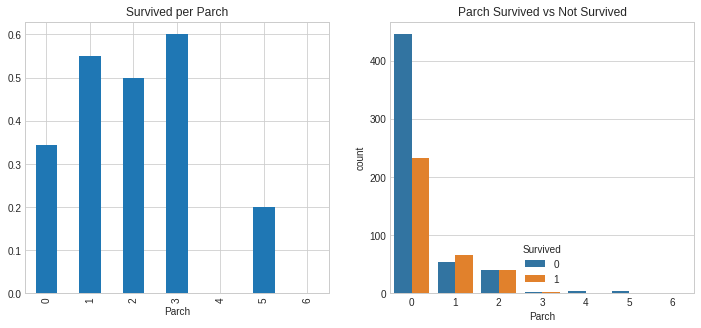

In [0]:
bag('Parch', 'Survived', 'Survived per Parch', 'Parch Survived vs Not Survived')

In [0]:
pd.crosstab([temp.Family, temp.Survived], temp.Pclass, margins=True).style.background_gradient(cmap='summer_r')

#### "Ticket"분석
* Ticket의 형태를 보겠습니다.
* Let's look at the numbers of the ticket.

In [0]:
temp.Ticket.head()

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
Name: Ticket, dtype: object

* 도무지 감이 안 잡히는 배열입니다.
* 빈칸이 없는지 보겠습니다.
 
* It is an array that may not make any sense.
* Let's see if there are any blanks.

In [0]:
temp.Ticket.isnull().any()

False

* 티켓에서 영문있는 것과 숫자만 있는 것을 따봅니다.
* See the tickets with letters or numbers only 

In [0]:
temp['Initick'] = temp.Ticket.str.extract('^([A-Za-z]+)')

temp = temp.reset_index(drop=True)  # to avoid `ValueError: cannot reindex from a duplicate axis`

temp.loc[temp.Initick.isnull(), 'Initick'] = temp['Ticket']

temp.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Initial,LastName,NumName,Age_Range,Agroup,Alone,Family,Initick
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,1,1,0.0,A/5 21171,2,Braund,0,"(21.0, 23.0]",21,NaN,2,A
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,2,1,1.0,PC 17599,5,Cumings,1,"(33.0, 39.0]",36,NaN,2,PC
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,2,0,1.0,STON/O2. 3101282,4,Heikkinen,2,"(23.0, 26.0]",24,1.0,1,STON
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,2,1,1.0,113803,5,Futrelle,3,"(33.0, 39.0]",36,NaN,2,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,1,0,0.0,373450,2,Allen,4,"(33.0, 39.0]",36,1.0,1,373450


In [0]:
temp['NumTicket'] = temp['Initick'].factorize()[0]

In [0]:
temp.head(n=15)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,...,Ticket,Initial,LastName,NumName,Age_Range,Agroup,Alone,Family,Initick,NumTicket
0,22.000000,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,1,1,...,A/5 21171,2,Braund,0,"(21.0, 23.0]",21,NaN,2,A,0
1,38.000000,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,2,1,...,PC 17599,5,Cumings,1,"(33.0, 39.0]",36,NaN,2,PC,1
2,26.000000,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,2,0,...,STON/O2. 3101282,4,Heikkinen,2,"(23.0, 26.0]",24,1.0,1,STON,2
3,35.000000,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,2,1,...,113803,5,Futrelle,3,"(33.0, 39.0]",36,NaN,2,113803,3
4,35.000000,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,1,0,...,373450,2,Allen,4,"(33.0, 39.0]",36,1.0,1,373450,4
5,32.252151,NaN,Q,8.4583,"Moran, Mr. James",0,6,3,1,0,...,330877,2,Moran,5,"(30.0, 32.252]",33,1.0,1,330877,5
6,54.000000,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,7,1,1,0,...,17463,2,McCarthy,6,"(48.0, 80.0]",60,1.0,1,17463,6
7,2.000000,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,8,3,1,3,...,349909,4,Palsson,7,"(0.169, 16.0]",2,NaN,5,349909,7
8,27.000000,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,2,0,...,347742,5,Johnson,8,"(26.0, 30.0]",28,NaN,3,347742,8
9,14.000000,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,2,1,...,237736,5,Nasser,9,"(0.169, 16.0]",13,NaN,2,237736,9


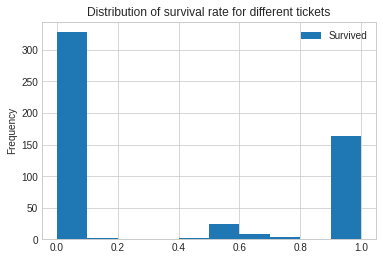

In [0]:
temp.groupby('NumTicket')['Survived'].mean().to_frame().plot(kind='hist')
plt.title('Distribution of survival rate for different tickets');

### "Fare" 분석

In [0]:
print('Highest Fare was:', temp['Fare'].max())
print('Lowest Fare was:', temp['Fare'].min())
print('Average Fare was:', temp['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 33.2954792813456


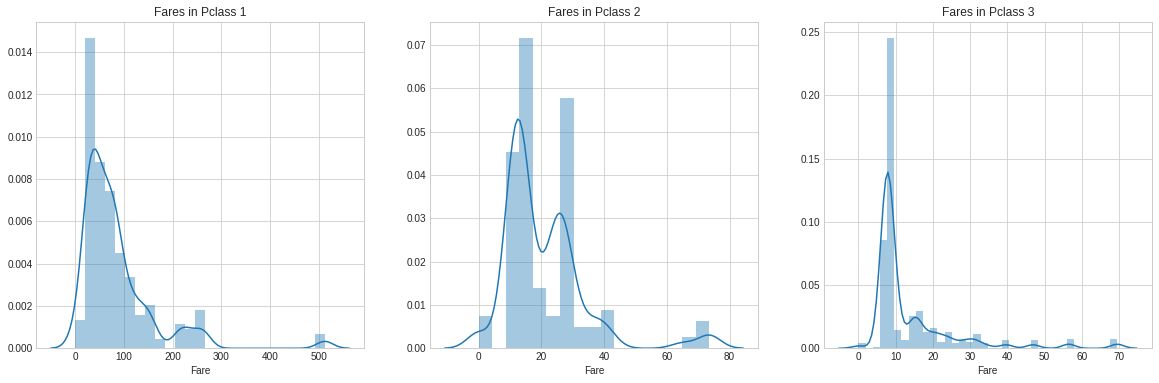

In [0]:
f,ax=plt.subplots(1, 3, figsize=(20, 6))
sns.distplot(train[train['Pclass'] == 1].Fare,ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(train[train['Pclass'] == 2].Fare,ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(train[train['Pclass'] == 3].Fare,ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()

* Pclass1의 승객 요금에는 큰 분포가있는 것으로 보이며 불연속 값으로 변환 할 수 있습니다.
* The passenger fare for Pclass1 seems to have a large distribution and can be converted to discrete values.

* Fare를 그룹으로 나누어 놓겠습니다.
* qcut을 활용하면 원하는 조각으로 데이터를 나누어 줍니다.
 
* I will divide the Fare into groups.
* Use qcut to divide the data into the desired pieces.

In [0]:
def groupmean(a,b):
    return temp.groupby([a])[b].mean().to_frame().style.background_gradient(cmap='summer_r')

temp['Fare_Range'] = pd.qcut(train['Fare'], 10)
groupmean('Fare_Range', 'Fare')

,Fare
Fare_Range,
"(-0.001, 7.55]",5.92872
"(7.55, 7.854]",7.76849
"(7.854, 8.05]",7.96367
"(8.05, 10.5]",9.52137
"(10.5, 14.454]",12.9402
"(14.454, 21.679]",17.3864
"(21.679, 27.0]",25.4875
"(27.0, 39.688]",32.2822
"(39.688, 77.958]",59.4446


* Fare를 그룹화 시킵니다. Fgroup이라고 이름 짓겠습니다.
* Group Fare with the name of Fgroup

0 and below -> 0

7.125 and below-> 5.0

7.9 and below-> 7.5

8.03 or less-> 8.0

Less than 10.5-> 9.5

Less than 23-> 16.0

27.8 and below-> 25.5

51 and below-> 38

73.5 and below-> 62

Over 73.5-> 100

In [0]:
temp['Fgroup'] = 0

temp.loc[temp['Fare'] <= 0,'Fgroup'] = 0
temp.loc[(temp['Fare'] > 0) & (temp['Fare'] <= 7.125), 'Fgroup'] = 1
temp.loc[(temp['Fare'] > 7.125) & (temp['Fare'] <= 7.9), 'Fgroup'] = 2
temp.loc[(temp['Fare'] > 7.9) & (temp['Fare'] <= 8.03), 'Fgroup'] = 3
temp.loc[(temp['Fare'] > 8.03) & (temp['Fare'] < 10.5), 'Fgroup'] = 4
temp.loc[(temp['Fare'] >= 10.5) & (temp['Fare'] < 23.0), 'Fgroup'] = 5
temp.loc[(temp['Fare'] >= 23.0) & (temp['Fare'] <= 27.8), 'Fgroup'] = 6
temp.loc[(temp['Fare'] > 27.8) & (temp['Fare'] <= 51.0), 'Fgroup'] = 7
temp.loc[(temp['Fare'] > 51.0) & (temp['Fare'] <= 73.5), 'Fgroup'] = 8
temp.loc[temp['Fare'] > 73.5, 'Fgroup'] = 9

temp.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,...,LastName,NumName,Age_Range,Agroup,Alone,Family,Initick,NumTicket,Fare_Range,Fgroup
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,1,1,...,Braund,0,"(21.0, 23.0]",21,NaN,2,A,0,"(-0.001, 7.55]",2
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,2,1,...,Cumings,1,"(33.0, 39.0]",36,NaN,2,PC,1,"(39.688, 77.958]",8
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,2,0,...,Heikkinen,2,"(23.0, 26.0]",24,1.0,1,STON,2,"(7.854, 8.05]",3
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,2,1,...,Futrelle,3,"(33.0, 39.0]",36,NaN,2,113803,3,"(39.688, 77.958]",8
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,1,0,...,Allen,4,"(33.0, 39.0]",36,1.0,1,373450,4,"(7.854, 8.05]",4


### "Cabin" 분석
* cabin 의 위치에 따라 달라지는 것이 있는지 보겠습니다.
* Let's see if there is anything that depends on the location of the cabin.

In [0]:
temp.Cabin.value_counts().head(10)

C23 C25 C27        6
B57 B59 B63 B66    5
G6                 5
D                  4
F2                 4
B96 B98            4
C78                4
C22 C26            4
F4                 4
F33                4
Name: Cabin, dtype: int64

In [0]:
temp.Cabin.isnull().sum()

1014

* 빈칸이 무척 많습니다.
* Lots of null values
* Cabin에 비어 있는 것이 많아 이를 다른 분류로 일단 잡고 기존 것은 이니셜로 분류합니다.
* 빈 것은 X로 구분하려는데 이 또한 1,2,3 Pclass와 연동될 것 같으니 비어있고 1등급은 X, 2등급은 Y, 3등급은 Z로 하겠습니다.
 
* There are so many empty bins in the cabin,
* Existing ones are classified as initials.
* I want to classify the nulls as X, but this is also reclassified by Pclasses, so there will be X, Y and Z

In [0]:
temp['Inicab'] = 0
temp['Inicab'] = temp['Cabin'].str.extract('^([A-Za-z]+)')
temp.loc[((temp['Cabin'].isnull()) & (temp['Pclass'].values == 1)), 'Inicab'] = 'X'
temp.loc[((temp['Cabin'].isnull()) & (temp['Pclass'].values == 2)), 'Inicab'] = 'Y'
temp.loc[((temp['Cabin'].isnull()) & (temp['Pclass'].values == 3)), 'Inicab'] = 'Z'
    
temp.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,...,NumName,Age_Range,Agroup,Alone,Family,Initick,NumTicket,Fare_Range,Fgroup,Inicab
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,1,1,...,0,"(21.0, 23.0]",21,NaN,2,A,0,"(-0.001, 7.55]",2,Z
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,2,1,...,1,"(33.0, 39.0]",36,NaN,2,PC,1,"(39.688, 77.958]",8,C
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,2,0,...,2,"(23.0, 26.0]",24,1.0,1,STON,2,"(7.854, 8.05]",3,Z
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,2,1,...,3,"(33.0, 39.0]",36,NaN,2,113803,3,"(39.688, 77.958]",8,C
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,1,0,...,4,"(33.0, 39.0]",36,1.0,1,373450,4,"(7.854, 8.05]",4,Z


In [0]:
temp['Inicab'] = temp['Inicab'].factorize()[0]
    
temp[11:20]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,...,NumName,Age_Range,Agroup,Alone,Family,Initick,NumTicket,Fare_Range,Fgroup,Inicab
11,58.000000,C103,S,26.5500,"Bonnell, Miss. Elizabeth",0,12,1,2,0,...,11,"(48.0, 80.0]",60,1.0,1,113783,11,"(21.679, 27.0]",6,1
12,20.000000,NaN,S,8.0500,"Saundercock, Mr. William Henry",0,13,3,1,0,...,12,"(16.0, 21.0]",18,1.0,1,A,0,"(7.854, 8.05]",4,0
13,39.000000,NaN,S,31.2750,"Andersson, Mr. Anders Johan",5,14,3,1,1,...,13,"(33.0, 39.0]",45,NaN,7,347082,12,"(27.0, 39.688]",7,0
14,14.000000,NaN,S,7.8542,"Vestrom, Miss. Hulda Amanda Adolfina",0,15,3,2,0,...,14,"(0.169, 16.0]",13,1.0,1,350406,13,"(7.55, 7.854]",2,0
15,55.000000,NaN,S,16.0000,"Hewlett, Mrs. (Mary D Kingcome)",0,16,2,2,0,...,15,"(48.0, 80.0]",60,1.0,1,248706,14,"(14.454, 21.679]",5,3
16,2.000000,NaN,Q,29.1250,"Rice, Master. Eugene",1,17,3,1,4,...,16,"(0.169, 16.0]",2,NaN,6,382652,15,"(27.0, 39.688]",7,0
17,32.252151,NaN,S,13.0000,"Williams, Mr. Charles Eugene",0,18,2,1,0,...,17,"(30.0, 32.252]",33,1.0,1,244373,16,"(10.5, 14.454]",5,3
18,31.000000,NaN,S,18.0000,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",0,19,3,2,1,...,18,"(30.0, 32.252]",31,NaN,2,345763,17,"(14.454, 21.679]",5,0
19,37.005848,NaN,C,7.2250,"Masselmani, Mrs. Fatima",0,20,3,2,0,...,19,"(33.0, 39.0]",36,1.0,1,2649,18,"(-0.001, 7.55]",2,0


#### "Embarked" 분석

In [0]:
pd.crosstab([temp.Embarked, temp.Pclass], [temp.Sex, temp.Survived], margins=True).style.background_gradient(cmap='summer_r')

* Survival rates per Embarked ports
* 승선 장소 별로 생존 확률

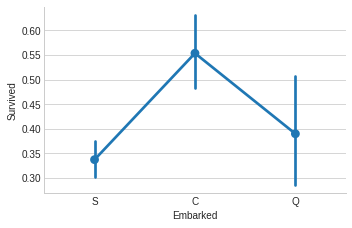

In [0]:
sns.factorplot('Embarked', 'Survived', data=temp)
fig = plt.gcf()
fig.set_size_inches(5, 3)
plt.show()

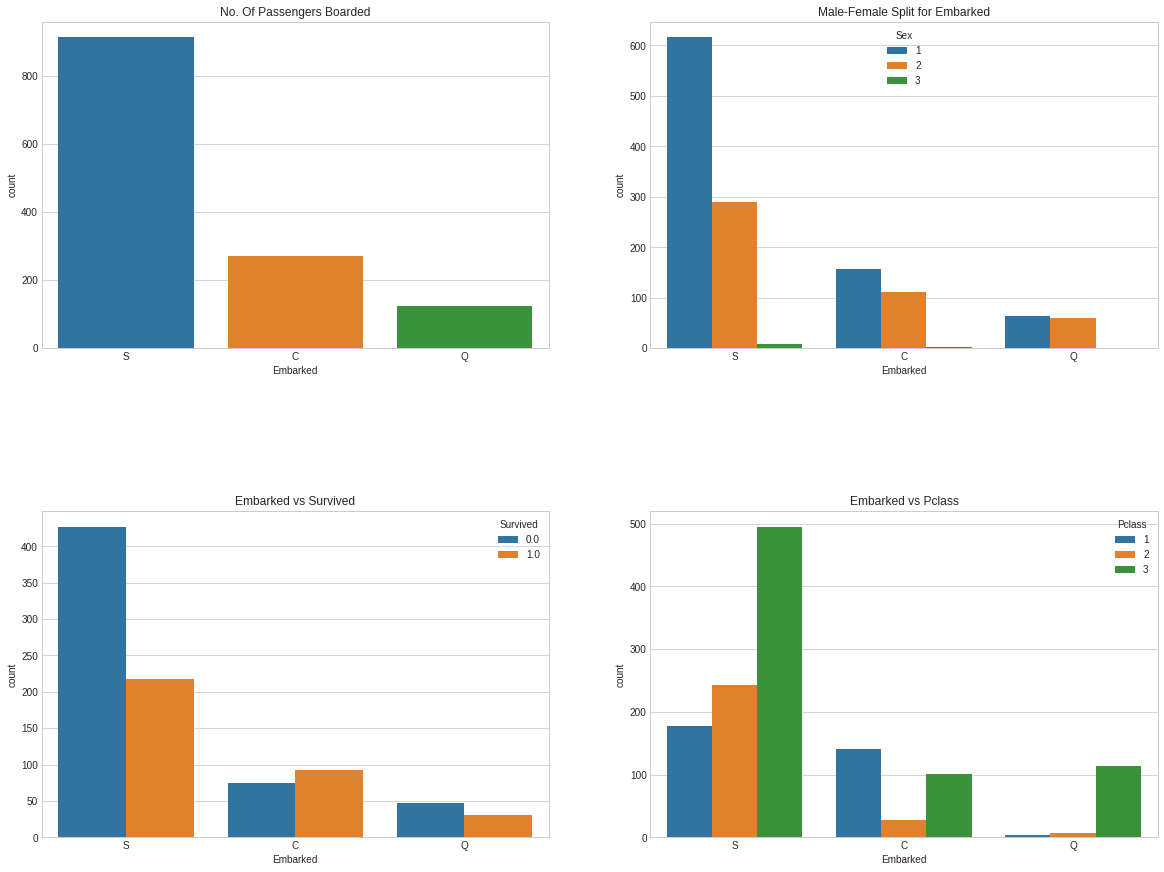

In [0]:
f,ax=plt.subplots(2,2,figsize=(20,15))
sns.countplot('Embarked', data=temp, ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')
sns.countplot('Embarked', hue='Sex', data=temp, ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot('Embarked', hue='Survived', data=temp, ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot('Embarked', hue='Pclass', data=temp, ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

1) 포트 C의 생존 가능성은 0.55 정도이며 S는 가장 낮습니다.S에서 탑승 최대. 대다수는 Pclass3

2) C의 승객들은 많은 비율이 살아남았습니다. 그 이유는 Pclass1 및 Pclass2 승객이 많아서 일 것입니다

3) Embark S는 대부분의 부자들이 탑승한 항구지만 생존 가능성은 낮습니다. Pclass3의 승객도 많았습니다.

4) 포트 Q는 승객의 거의 95 %가 Pclass3

observation :

1) Maximum boarding in S. The majority is Pclass3

2) Passengers of C survived a large proportion. The reason would be due to the large number of Pclass1 and Pclass2 passengers

3) Embark S is the port where most rich people board, but it is unlikely to survive. Lots of passengers in Pclass3.

4) Port Q has almost 95% of passengers Pclass3

* 빈칸이 두개 있는데 보겠습니다.
* Let us see 2 null values

In [0]:
temp.loc[(temp.Embarked.isnull())]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,...,NumName,Age_Range,Agroup,Alone,Family,Initick,NumTicket,Fare_Range,Fgroup,Inicab
61,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,62,1,2,0,...,58,"(33.0, 39.0]",36,1.0,1,113572,51,"(77.958, 512.329]",9,8
829,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,830,1,2,0,...,616,"(48.0, 80.0]",60,1.0,1,113572,51,"(77.958, 512.329]",9,8


* 두 사람의 티켓 번호가 같습니다.
* 혹시 같은 티켓 번호가 있는 다른 사람이 있는지 봅니다.
 
* Two people have the same ticket number.
* See if anyone else has the same ticket number.

In [0]:
temp.loc[(temp.Ticket == '113572')]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,...,NumName,Age_Range,Agroup,Alone,Family,Initick,NumTicket,Fare_Range,Fgroup,Inicab
61,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,62,1,2,0,...,58,"(33.0, 39.0]",36,1.0,1,113572,51,"(77.958, 512.329]",9,8
829,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,830,1,2,0,...,616,"(48.0, 80.0]",60,1.0,1,113572,51,"(77.958, 512.329]",9,8


* 가장 비슷한 번호를 찾아 보겠습니다.
* Let's find the similar numbers.

In [0]:
temp.sort_values(['Ticket'], ascending = True)[55:70]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,...,NumName,Age_Range,Agroup,Alone,Family,Initick,NumTicket,Fare_Range,Fgroup,Inicab
54,65.000000,B30,C,61.9792,"Ostby, Mr. Engelhart Cornelius",1,55,1,1,0,...,51,"(48.0, 80.0]",60,NaN,2,113509,46,"(39.688, 77.958]",8,8
351,32.252151,C128,S,35.0000,"Williams-Lambert, Mr. Fletcher Fellows",0,352,1,1,0,...,17,"(30.0, 32.252]",33,1.0,1,113510,232,"(27.0, 39.688]",7,1
252,62.000000,C87,S,26.5500,"Stead, Mr. William Thomas",0,253,1,1,0,...,217,"(48.0, 80.0]",60,1.0,1,113514,171,"(21.679, 27.0]",6,1
829,62.000000,B28,NaN,80.0000,"Stone, Mrs. George Nelson (Martha Evelyn)",0,830,1,2,0,...,616,"(48.0, 80.0]",60,1.0,1,113572,51,"(77.958, 512.329]",9,8
61,38.000000,B28,NaN,80.0000,"Icard, Miss. Amelie",0,62,1,2,0,...,58,"(33.0, 39.0]",36,1.0,1,113572,51,"(77.958, 512.329]",9,8
802,11.000000,B96 B98,S,120.0000,"Carter, Master. William Thornton II",2,803,1,1,1,...,215,"(0.169, 16.0]",13,NaN,4,113760,253,"(77.958, 512.329]",9,8
390,36.000000,B96 B98,S,120.0000,"Carter, Mr. William Ernest",2,391,1,1,1,...,215,"(33.0, 39.0]",36,NaN,4,113760,253,"(77.958, 512.329]",9,8
435,14.000000,B96 B98,S,120.0000,"Carter, Miss. Lucile Polk",2,436,1,2,1,...,215,"(0.169, 16.0]",13,NaN,4,113760,253,"(77.958, 512.329]",9,8
763,36.000000,B96 B98,S,120.0000,"Carter, Mrs. William Ernest (Lucile Polk)",2,764,1,2,1,...,215,"(33.0, 39.0]",36,NaN,4,113760,253,"(77.958, 512.329]",9,8
185,32.252151,A32,S,50.0000,"Rood, Mr. Hugh Roscoe",0,186,1,1,0,...,162,"(30.0, 32.252]",33,1.0,1,113767,127,"(39.688, 77.958]",7,6


* 앞 뒤로 모두 S이고 Pclass도 모두 1인 것으로 봐서 S일 가능성이 큽니다.
* It is most likely that it is S because both front and back are S and Pclass is all 1.

In [0]:
temp.loc[(temp.Embarked.isnull()), 'Embarked'] = 'S'

In [0]:
temp.loc[(temp.Embarked.isnull())]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,...,NumName,Age_Range,Agroup,Alone,Family,Initick,NumTicket,Fare_Range,Fgroup,Inicab


In [0]:
temp['Embarked'] = temp['Embarked'].factorize()[0]
    
temp[11:20]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,...,NumName,Age_Range,Agroup,Alone,Family,Initick,NumTicket,Fare_Range,Fgroup,Inicab
11,58.000000,C103,0,26.5500,"Bonnell, Miss. Elizabeth",0,12,1,2,0,...,11,"(48.0, 80.0]",60,1.0,1,113783,11,"(21.679, 27.0]",6,1
12,20.000000,NaN,0,8.0500,"Saundercock, Mr. William Henry",0,13,3,1,0,...,12,"(16.0, 21.0]",18,1.0,1,A,0,"(7.854, 8.05]",4,0
13,39.000000,NaN,0,31.2750,"Andersson, Mr. Anders Johan",5,14,3,1,1,...,13,"(33.0, 39.0]",45,NaN,7,347082,12,"(27.0, 39.688]",7,0
14,14.000000,NaN,0,7.8542,"Vestrom, Miss. Hulda Amanda Adolfina",0,15,3,2,0,...,14,"(0.169, 16.0]",13,1.0,1,350406,13,"(7.55, 7.854]",2,0
15,55.000000,NaN,0,16.0000,"Hewlett, Mrs. (Mary D Kingcome)",0,16,2,2,0,...,15,"(48.0, 80.0]",60,1.0,1,248706,14,"(14.454, 21.679]",5,3
16,2.000000,NaN,2,29.1250,"Rice, Master. Eugene",1,17,3,1,4,...,16,"(0.169, 16.0]",2,NaN,6,382652,15,"(27.0, 39.688]",7,0
17,32.252151,NaN,0,13.0000,"Williams, Mr. Charles Eugene",0,18,2,1,0,...,17,"(30.0, 32.252]",33,1.0,1,244373,16,"(10.5, 14.454]",5,3
18,31.000000,NaN,0,18.0000,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",0,19,3,2,1,...,18,"(30.0, 32.252]",31,NaN,2,345763,17,"(14.454, 21.679]",5,0
19,37.005848,NaN,1,7.2250,"Masselmani, Mrs. Fatima",0,20,3,2,0,...,19,"(33.0, 39.0]",36,1.0,1,2649,18,"(-0.001, 7.55]",2,0


## 6. Feature Engineering

### 6.1 Turning string to numbers

* Already done above

### 6.2 Adding Features

* Some done above

* 그래도 몇 개 만들어 볼까요? But why don't we try making some more

* Priority - (1) Nobles (2) Women in Pclass 1 (3) Babies under 1 (4) Kids under 17 in Pclass 1 & 2  (5) Women in Pclass 3
* FH - Female Higher Survival Group
* MH - Male Higher Survival Group
* FL - Female Lower Surival Group
* ML - Male Lower Survival Group

* And I will keep making new ones until all the data are either over 80% or le

### Priority - (1) Nobles (2) Women in Pclass 1 (3) Babies under 1 (4) Kids under 17 in Pclass 1 & 2  (5) Women in Pclass 2 (6) Higher Fare

In [0]:
survpct('Initial')

Initial
1    0.000000
2    0.156069
3    0.454545
4    0.675676
5    0.792000
6    1.000000
Name: Survived, dtype: float64

In [0]:
survpct('Pclass')

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [0]:
survpct('Sex')

Sex
1    0.181818
2    0.740385
3    1.000000
Name: Survived, dtype: float64

In [0]:
survpct('Age').head()

Age
0.17    NaN
0.33    NaN
0.42    1.0
0.67    1.0
0.75    1.0
Name: Survived, dtype: float64

In [0]:
survpct('Fgroup')

Fgroup
0    0.066667
1    0.037037
2    0.232044
3    0.473684
4    0.144330
5    0.425000
6    0.489362
7    0.353535
8    0.564516
9    0.762887
Name: Survived, dtype: float64

In [0]:
temp['Priority'] = 0
temp.loc[(temp['Initial'] == 6), 'Priority'] = 1
temp.loc[(temp['Pclass'] == 1) & (temp['Sex'] == 2), 'Priority'] = 2
temp.loc[(temp['Age'] < 1), 'Priority'] = 3
temp.loc[(temp['Pclass'] == 1) & (temp['Age'] <= 17), 'Priority'] = 4
temp.loc[(temp['Pclass'] == 2) & (temp['Age'] <= 17), 'Priority'] = 5
temp.loc[(temp['Pclass'] == 2) & (temp['Sex'] == 2), 'Priority'] = 6
temp.loc[(temp['Fgroup'] == 9), 'Priority'] = 7

In [0]:
survpct('Priority')

Priority
0    0.229508
1    1.000000
2    0.965517
3    1.000000
4    1.000000
5    0.818182
6    0.921053
7    0.762887
Name: Survived, dtype: float64

In [0]:
temp.Priority.value_counts()

0    978
7    145
6    105
2     52
5     16
3      7
4      4
1      2
Name: Priority, dtype: int64

In [0]:
survpct('Family')

Family
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64

In [0]:
survpct('Fgroup')

Fgroup
0    0.066667
1    0.037037
2    0.232044
3    0.473684
4    0.144330
5    0.425000
6    0.489362
7    0.353535
8    0.564516
9    0.762887
Name: Survived, dtype: float64

In [0]:
temp['FH'] = 0
temp.loc[(temp['Sex'] == 1), 'FH'] = 0
temp.loc[(temp['Sex'] == 2), 'FH'] = 1
temp.loc[(temp['Sex'] == 2) & (temp['Family'] == 2), 'FH'] = 2
temp.loc[(temp['Sex'] == 2) & (temp['Family'] == 3), 'FH'] = 3
temp.loc[(temp['Sex'] == 2) & (temp['Family'] == 4), 'FH'] = 4
temp.loc[(temp['Sex'] == 2) & (temp['Family'] == 1) & (temp['Pclass'] == 1), 'FH'] = 5
temp.loc[(temp['Sex'] == 2) & (temp['Family'] == 1) & (temp['Pclass'] == 2), 'FH'] = 6
temp.loc[(temp['Sex'] == 2) & (temp['Fgroup'] == 3), 'FH'] = 7
temp.loc[(temp['Sex'] == 2) & (temp['Fgroup'] >= 5), 'FH'] = 8

In [0]:
survpct('FH')

FH
0    0.191710
1    0.615385
2    0.333333
3    0.000000
7    0.666667
8    0.784553
Name: Survived, dtype: float64

In [0]:
temp.FH.value_counts()

0    847
8    354
1     89
7      8
2      7
3      4
Name: FH, dtype: int64

In [0]:
temp['MH'] = 0
temp.loc[(temp['Sex'] == 2), 'MH'] = 0
temp.loc[(temp['Sex'] == 1), 'MH'] = 1
temp.loc[(temp['Sex'] == 1) & (temp['Family'] == 2), 'MH'] = 2
temp.loc[(temp['Sex'] == 1) & (temp['Family'] == 3), 'MH'] = 3
temp.loc[(temp['Sex'] == 1) & (temp['Family'] == 4), 'MH'] = 4
temp.loc[(temp['Sex'] == 1) & (temp['Family'] == 1) & (temp['Pclass'] == 1), 'MH'] = 5
temp.loc[(temp['Sex'] == 1) & (temp['Family'] == 1) & (temp['Pclass'] == 2), 'MH'] = 6
temp.loc[(temp['Sex'] == 1) & (temp['Fgroup'] == 3), 'MH'] = 7
temp.loc[(temp['Sex'] == 1) & (temp['Fgroup'] >= 5), 'MH'] = 8

In [0]:
survpct('MH')

MH
0    0.746082
1    0.094017
2    0.111111
3    0.000000
5    0.000000
6    0.000000
7    0.384615
8    0.253333
Name: Survived, dtype: float64

In [0]:
temp.MH.value_counts()

0    474
8    450
1    335
7     16
2     13
5      8
6      7
3      6
Name: MH, dtype: int64

In [0]:
temp['FL'] = 0
temp.loc[(temp['Sex'] == 1), 'FL'] = 0
temp.loc[(temp['Sex'] == 2) & (temp['Fgroup'] < 5), 'FL'] = 1
temp.loc[(temp['Sex'] == 2) & (temp['Fgroup'] != 3), 'FL'] = 2
temp.loc[(temp['Sex'] == 2) & (temp['FH'] == 1), 'FL'] = 3
temp.loc[(temp['Sex'] == 2) & (temp['Family'] < 2), 'FL'] = 4
temp.loc[(temp['Sex'] == 2) & (temp['Family'] > 4), 'FL'] = 5
temp.loc[(temp['Sex'] == 2) & (temp['Family'] == 1) & (temp['Pclass'] == 3), 'FL'] = 6


In [0]:
survpct('FL')

FL
0    0.191710
1    0.000000
2    0.809211
4    0.939394
5    0.272727
6    0.616667
Name: Survived, dtype: float64

In [0]:
temp.FL.value_counts()

0    847
2    225
6    100
4     94
5     41
1      2
Name: FL, dtype: int64

In [0]:
temp['ML'] = 0
temp.loc[(temp['Sex'] == 2), 'ML'] = 0
temp.loc[(temp['Sex'] == 1) & (temp['Fgroup'] < 5), 'ML'] = 1
temp.loc[(temp['Sex'] == 1) & (temp['Fgroup'] != 3), 'ML'] = 2
temp.loc[(temp['Sex'] == 1) & (temp['MH'] <7), 'ML'] = 3
temp.loc[(temp['Sex'] == 1) & (temp['Family'] < 2), 'ML'] = 4
temp.loc[(temp['Sex'] == 1) & (temp['Family'] > 4), 'ML'] = 5
temp.loc[(temp['Sex'] == 1) & (temp['Family'] == 1) & (temp['Pclass'] == 3), 'ML'] = 6

In [0]:
survpct('ML')

ML
0    0.746082
1    0.333333
2    0.318966
3    0.076923
4    0.217687
5    0.034483
6    0.121212
Name: Survived, dtype: float64

In [0]:
temp.ML.value_counts()

0    474
6    372
4    224
2    176
5     41
3     19
1      3
Name: ML, dtype: int64

### Deciding final features

In [0]:
temp['F1'] = temp['Priority']
temp['F2'] = temp['FH']
temp['F3'] = temp['MH']
temp['F4'] = temp['FL']
temp['F5'] = temp['ML']
temp['F6'] = temp['Initial']
temp['F7'] = temp['Fgroup']
temp['F8'] = temp['NumName']
temp['F9'] = temp['NumTicket']
temp['F10'] = temp['Family']
temp['F11'] = temp['Embarked']
temp['F12'] = temp['Sex']
temp['F13'] = temp['Pclass']

* Now we are ready to move on.
* 이제 다음 단계로 갑니다.

* Let's make two new dataframes, one for label encoding, the other for one-hot-encoding
* 두개의 새로운 데이터 프레임을 만듭니다. 하나는 레이블 인코딩 다른 하나는 원핫 인코딩 (둘이 꼭 필요한 것이 아니라 연습이나 두 가지 방 법 모두 사용해봄)

* 대표적인 인코딩에 Label Encoding이 있는데 이는 각 항목의 값을 서열화 시켜 주~욱 줄세운 것이라 생각하시면 됩니다.
* 그 외에 자주쓰는 One Hot Encoding 같은 경우 열 내에서의 항목을 나누어서 (열이 주~욱 늘어나며) 이를 0이냐 1이냐로 구분해 놓은 것입니다.
* A typical encoding is Label Encoding, which can be considered to be a very good order of the values of each item.
* In addition, the one-of-a-kind One Hot Encoding is divided into 0 or 1 by dividing the items in the column (they increase in number).

* 다시 말씀 드려서 레이블 인코딩은 줄을 세워서 번호를 부여하는 것이고, 원핫인코딩은 긴가 아닌가 두 가지입니다.
* label encoding assign ordinal numbers while one hot encoding gives 1 or 0

* For example 16 year old is number 5 and 17 year old is number 6 ..that's the way it is for the label encoding
* 예를들어 나이별로 줄을 세워 너는 5번, 너는 6번이런식이 레이블 인코딩이고

* If you are 16 yes or no , 17 yes or no...that's one hot encoding
* 16살이야? 1, 16살 아냐 0 ..그 다음 17살이야? 1 17살 아냐 0 ..이런 식으라 열의 수가 무지하게 늘어납니다.

In [0]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

새로운 Data Frame을 만듭니다.

In [0]:
dfl = pd.DataFrame() # for label encoding

In [0]:
good_columns = ['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11', 'F12', 'F13']
dfl[good_columns] = temp[good_columns]

In [0]:
dfl.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13
0,0,0,2,0,3,2,2,0,0,2,0,1,3
1,2,8,0,2,0,5,8,1,1,2,1,2,1
2,0,7,0,6,0,4,3,2,2,1,0,2,3
3,2,8,0,2,0,5,8,3,3,2,0,2,1
4,0,0,1,0,6,2,4,4,4,1,0,1,3


In [0]:
dfh = dfl.copy()

In [0]:
dfl_enc = dfl.apply(LabelEncoder().fit_transform)
                          
dfl_enc.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13
0,0,0,2,0,3,1,2,0,0,1,0,0,2
1,2,5,0,2,0,4,8,1,1,1,1,1,0
2,0,4,0,5,0,3,3,2,2,0,0,1,2
3,2,5,0,2,0,4,8,3,3,1,0,1,0
4,0,0,1,0,6,1,4,4,4,0,0,0,2


In [0]:
one_hot_cols = dfh.columns.tolist()
dfh_enc = pd.get_dummies(dfh, columns=one_hot_cols)

dfh_enc.head()

,F1_0,F1_1,F1_2,F1_3,F1_4,F1_5,F1_6,F1_7,F2_0,F2_1,...,F10_11,F11_0,F11_1,F11_2,F12_1,F12_2,F12_3,F13_1,F13_2,F13_3
0,1,0,0,0,0,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
3,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
4,1,0,0,0,0,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,1


# Making ML models / 머신러닝 모델 만들기

* 자, 이제 머신 러닝 모델을 만들어 보지요.
* 우선 인코딩한 파일을 train과 test로 아까 구분해 놓은 행으로 쪼갭니다

* Now let's create a machine learning model.
* First, split the encoded file into the lines that were previously separated by train and test.

In [0]:
train = dfh_enc[:ntrain]
test = dfh_enc[ntrain:]

In [0]:
X_test = test
X_train = train

In [0]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [0]:
ran = RandomForestClassifier(random_state=1)
knn = KNeighborsClassifier()
log = LogisticRegression()
xgb = XGBClassifier()
gbc = GradientBoostingClassifier()
svc = SVC(probability=True)
ext = ExtraTreesClassifier()
ada = AdaBoostClassifier()
gnb = GaussianNB()
gpc = GaussianProcessClassifier()
bag = BaggingClassifier()

# Prepare lists
models = [ran, knn, log, xgb, gbc, svc, ext, ada, gnb, gpc, bag]         
model_names = ['Random Forest', 'K Nearest Neighbour', 'Logistic Regression', 'XGBoost', 'Gradient Boosting', 'SVC', 'Extra Trees', 'AdaBoost', 'Gaussian Naive Bayes', 'Gaussian Process', 'Bagging Classifier']
scores = {}

# Sequentially fit and cross validate all models
for ind, mod in enumerate(models):
    mod.fit(X_train, y_train)
    acc = cross_val_score(mod, X_train, y_train, scoring = "accuracy", cv = 10)
    scores[model_names[ind]] = acc

In [0]:
# 결과 테이블을 만듭니다.
results = pd.DataFrame(scores).T
results['mean'] = results.mean(1)

result_df = results.sort_values(by='mean', ascending=False)#.reset_index()
result_df.head(11)

,0,1,2,3,4,5,6,7,8,9,mean
Random Forest,0.844444,0.898876,0.764045,0.898876,0.887640,0.842697,0.865169,0.786517,0.876404,0.831461,0.849613
Extra Trees,0.833333,0.887640,0.741573,0.910112,0.898876,0.865169,0.853933,0.786517,0.853933,0.842697,0.847378
Bagging Classifier,0.844444,0.853933,0.752809,0.887640,0.898876,0.842697,0.831461,0.786517,0.853933,0.842697,0.839501
Logistic Regression,0.833333,0.887640,0.786517,0.887640,0.865169,0.820225,0.831461,0.775281,0.865169,0.820225,0.837266
AdaBoost,0.811111,0.853933,0.764045,0.865169,0.865169,0.786517,0.842697,0.831461,0.831461,0.853933,0.830549
Gradient Boosting,0.822222,0.831461,0.764045,0.887640,0.865169,0.820225,0.842697,0.797753,0.831461,0.842697,0.830537
SVC,0.800000,0.808989,0.786517,0.876404,0.853933,0.808989,0.831461,0.764045,0.853933,0.808989,0.819326
XGBoost,0.777778,0.820225,0.719101,0.887640,0.853933,0.820225,0.820225,0.775281,0.842697,0.831461,0.814856
K Nearest Neighbour,0.700000,0.662921,0.651685,0.662921,0.752809,0.730337,0.741573,0.775281,0.808989,0.752809,0.723933
Gaussian Process,0.633333,0.606742,0.707865,0.719101,0.685393,0.764045,0.674157,0.719101,0.741573,0.741573,0.699288


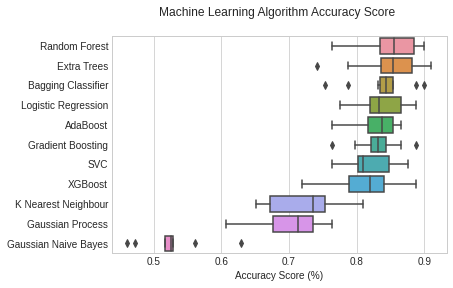

In [0]:

result_df = result_df.drop(['mean'], axis=1)
sns.boxplot(data=result_df.T, orient='h')
plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)');

In [0]:
# 중요도를 보는 함수를 만듭니다.
def importance_plotting(data, xlabel, ylabel, title, n=20):
    sns.set(style="whitegrid")
    ax = data.tail(n).plot(kind='barh')
    
    ax.set(title=title, xlabel=xlabel, ylabel=ylabel)
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)
    plt.show()

In [0]:
# 데이터 프레임에 항목 중요도를 넣습니다.
fi = {'Features':train.columns.tolist(), 'Importance':xgb.feature_importances_}
importance = pd.DataFrame(fi, index=fi['Features']).sort_values('Importance', ascending=True)

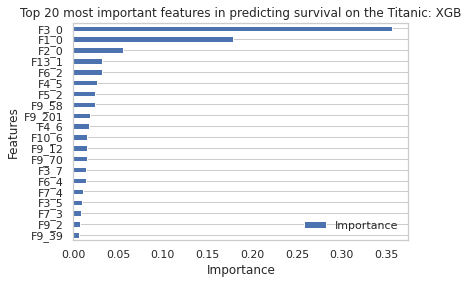

In [0]:
# 그래프 제목
title = 'Top 20 most important features in predicting survival on the Titanic: XGB'

# 그래프 그리기
importance_plotting(importance, 'Importance', 'Features', title, 20)

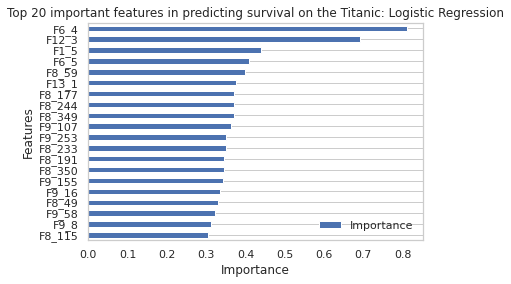

In [0]:
# 중요도를 데이터프레임에 넣습니다. Logistic regression에서는 중요도보다 coefficients를 사용합니다. 
# 아래는 Features라는 열에 트레인의 열들의 이름을 리스트로 만들어서 넣고 Importance에는 Logistic regression에는 coefficient를 바꾸어 넣어라는 넘파이 명령입니다.(즉 가로를 세로로)
fi = {'Features':train.columns.tolist(), 'Importance':np.transpose(log.coef_[0])}
importance = pd.DataFrame(fi, index=fi['Features']).sort_values('Importance', ascending=True)
# 그래프 타이틀
title = 'Top 20 important features in predicting survival on the Titanic: Logistic Regression'

# 그래프 그리기
importance_plotting(importance, 'Importance', 'Features', title, 20)

In [0]:
# 5가지 모델에 대한 항목 중요도 얻기
gbc_imp = pd.DataFrame({'Feature':train.columns, 'gbc importance':gbc.feature_importances_})
xgb_imp = pd.DataFrame({'Feature':train.columns, 'xgb importance':xgb.feature_importances_})
ran_imp = pd.DataFrame({'Feature':train.columns, 'ran importance':ran.feature_importances_})
ext_imp = pd.DataFrame({'Feature':train.columns, 'ext importance':ext.feature_importances_})
ada_imp = pd.DataFrame({'Feature':train.columns, 'ada importance':ada.feature_importances_})

# 이를 하나의 데이터프레임으로
importances = gbc_imp.merge(xgb_imp, on='Feature').merge(ran_imp, on='Feature').merge(ext_imp, on='Feature').merge(ada_imp, on='Feature')

# 항목당 평균 중요도
importances['Average'] = importances.mean(axis=1)

# 랭킹 정하기
importances = importances.sort_values(by='Average', ascending=False).reset_index(drop=True)


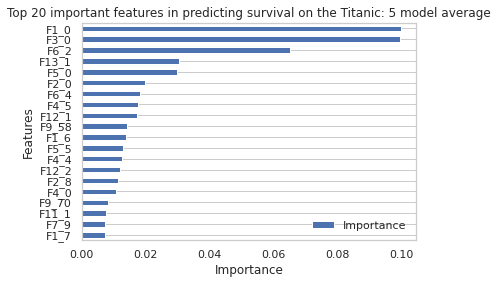

In [0]:
# 중요도를 다시 데이터 프레임에 넣기
fi = {'Features':importances['Feature'], 'Importance':importances['Average']}
importance = pd.DataFrame(fi).set_index('Features').sort_values('Importance', ascending=True)

# 그래프 타이틀
title = 'Top 20 important features in predicting survival on the Titanic: 5 model average'

# 그래프 보기
importance_plotting(importance, 'Importance', 'Features', title, 20)

In [0]:
importance1 = importance[-381:]

importance1[371:381]

,Importance
Features,
F9_58,0.014115
F12_1,0.017238
F4_5,0.017663
F6_4,0.018290
F2_0,0.019922
F5_0,0.029879
F13_1,0.030582
F6_2,0.065157
F3_0,0.099731


In [0]:
# 영양가 있는 380개만 넣기
mylist = list(importance1.index)

In [0]:
train1 = pd.DataFrame()
test1 = pd.DataFrame()

for i in mylist:
    train1[i] = train[i]
    test1[i]= test[i]
    
train1.head()


,F8_129,F9_34,F9_246,F9_339,F8_553,F8_591,F8_398,F8_38,F9_349,F8_154,...,F9_58,F12_1,F4_5,F6_4,F2_0,F5_0,F13_1,F6_2,F3_0,F1_0
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,1


In [0]:
train = train1
test = test1

# 모델의 변수를 다시 정의하고
X_train = train
X_test = test

# 바꿉니다.
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [0]:
ran = RandomForestClassifier(random_state=1)
knn = KNeighborsClassifier()
log = LogisticRegression()
xgb = XGBClassifier(random_state=1)
gbc = GradientBoostingClassifier(random_state=1)
svc = SVC(probability=True)
ext = ExtraTreesClassifier(random_state=1)
ada = AdaBoostClassifier(random_state=1)
gnb = GaussianNB()
gpc = GaussianProcessClassifier()
bag = BaggingClassifier(random_state=1)

# Prepare lists
models = [ran, knn, log, xgb, gbc, svc, ext, ada, gnb, gpc, bag]         
model_names = ['Random Forest', 'K Nearest Neighbour', 'Logistic Regression', 'XGBoost', 'Gradient Boosting', 'SVC', 'Extra Trees', 'AdaBoost', 'Gaussian Naive Bayes', 'Gaussian Process', 'Bagging Classifier']
scores2 = {}

# Sequentially fit and cross validate all models
for ind, mod in enumerate(models):
    mod.fit(X_train, y_train)
    acc = cross_val_score(mod, X_train, y_train, scoring = "accuracy", cv = 10)
    scores2[model_names[ind]] = acc

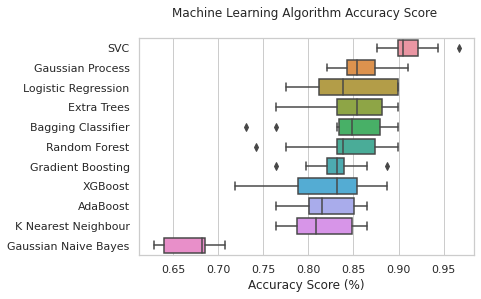

In [0]:
# 결과 테이블을 만듭니다.
results = pd.DataFrame(scores2).T
results['mean'] = results.mean(1)

result_df = results.sort_values(by='mean', ascending=False)#.reset_index()
result_df.head(11)
result_df = result_df.drop(['mean'], axis=1)
sns.boxplot(data=result_df.T, orient='h')
plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)');

## 하이퍼파라미터 튜닝

### SVC
* Scikit-Learn에서는 3가지 모형 최적화 도구를 지원하는데 validation_curve/ GridSearchCV/ ParameterGrid이다
* fit 메소드를 호출하면 grid search가 자동으로 여러개의 내부 모형을 생성하고 이를 모두 실행시켜서 최적 파라미터를 찾는다.

* bestscore는 최고 점수이고 best estimator는 최고 점수를 낸 파라미터를 가진 모형
* c값과 gamma값은 10의 배수로 일반적으로 한다.
* 감마 매개 변수는 단일 학습 예제의 영향이 도달하는 정도를 정의하며 낮은 값은 'far'를, 높은 값은 'close'를 나타냅니다. 감마 매개 변수는 서포트 벡터로 모델에 의해 선택된 샘플의 영향 반경의 역으로 볼 수 있습니다.
* C 매개 변수는 의사 결정 표면의 단순성에 대한 훈련 예제의 오 분류를 제거합니다. C가 낮을수록 결정 표면이 매끄럽고 높은 C는 모델이 더 많은 샘플을 서포트 벡터로 자유롭게 선택할 수 있도록하여 모든 학습 예제를 올바르게 분류하는 것을 목표로합니다.
* Verbose는 불리안 값으로 True로 넣으면 꼬치 꼬치 다 알려주는데, 대신 시간이 좀 더 오래 걸립니다.
* cv =5는 5 fold로 교차 검증한다는 뜻입니다.

In [0]:
# 파라미터 서치
Cs = [0.01, 0.1, 1, 5, 10, 15, 20, 50]
gammas = [0.001, 0.01, 0.1]

# 파라미터 그리드 셋팅
hyperparams = {'C': Cs, 'gamma' : gammas}

# 교차검증
gd=GridSearchCV(estimator = SVC(probability=True), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy", n_jobs=-1)

# 모델 fiting 및 결과
gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   15.3s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   33.1s finished


0.9012177515535746
{'C': 1, 'gamma': 0.001}


### Gradient Boosting Classifier
* learning_rate는 각 트리의 기여를 줄이는 역할을 합니다.
* n_estimator는 각 경우의 트리 숫자입니다.

In [0]:
learning_rate = [0.01, 0.05, 0.1, 0.2, 0.5]
n_estimators = [100, 1000, 2000]
max_depth = [3, 5, 10, 15]

hyperparams = {'learning_rate': learning_rate, 'n_estimators': n_estimators}

gd=GridSearchCV(estimator = GradientBoostingClassifier(), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy", n_jobs=-1)

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:  2.5min finished


0.8506936162199485
{'learning_rate': 0.5, 'n_estimators': 2000}


### Logistic Regression
* Penalty - L1 을 사용하는 회귀 모델을 Lasso Regression이라고하고 L2를 사용하는 모델을 Ridge Regression이라고합니다. 이 둘의 주요 차이점은 페널티입니다. 릿지 회귀는 손실 함수에 페널티 항으로 계수의 "제곱 크기"를 추가합니다. L2-norm이 오차를 제곱하기 때문에 (오류> 1 인 경우 로트가 증가 함) 모델은 L1-norm보다 훨씬 큰 오차 (e vs e ^ 2)를 보게되므로 훨씬 더 민감합니다. 따라서 오류를 최소화하기 위해 모델을 조정해줍니다.
* C는 estimator 입니다. logspace 1차원 10개 배열로 0에서 4까지를 estimator로 놓은 것입니다.

In [0]:
penalty = ['l1', 'l2']
C = np.logspace(0, 4, 10)

hyperparams = {'penalty': penalty, 'C': C}

gd=GridSearchCV(estimator = LogisticRegression(), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy", n_jobs=-1)

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


0.8484589793484402
{'C': 59.94842503189409, 'penalty': 'l2'}


[Parallel(n_jobs=-1)]: Done  93 out of 100 | elapsed:    1.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.4s finished


### XGBoost Step 1.

In [0]:
learning_rate = [0.001, 0.005, 0.01, 0.05, 0.1, 0.2]
n_estimators = [10, 50, 100, 250, 500, 1000]

hyperparams = {'learning_rate': learning_rate, 'n_estimators': n_estimators}

gd=GridSearchCV(estimator = XGBClassifier(), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy", n_jobs=-1)

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   48.6s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  4.7min finished


0.827185989580064
{'learning_rate': 0.005, 'n_estimators': 250}


### XGB Step 2.

In [0]:
max_depth = [3, 4, 5, 6, 7, 8, 9, 10]
min_child_weight = [1, 2, 3, 4, 5, 6]

hyperparams = {'max_depth': max_depth, 'min_child_weight': min_child_weight}

gd=GridSearchCV(estimator = XGBClassifier(learning_rate=0.2, n_estimators=10), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy", n_jobs=-1)

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    3.4s


0.8350260498399347
{'max_depth': 6, 'min_child_weight': 3}


[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   13.2s finished


### XGB Step 3.


In [0]:
gamma = [i*0.1 for i in range(0,5)]

hyperparams = {'gamma': gamma}

gd=GridSearchCV(estimator = XGBClassifier(learning_rate=0.2, n_estimators=10, max_depth=6, 
                                          min_child_weight=1), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy", n_jobs=-1)

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 5 candidates, totalling 25 fits
0.8282907538760906
{'gamma': 0.30000000000000004}


[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    1.6s finished


### XGB Step 4

In [0]:
subsample = [0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1]
colsample_bytree = [0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1]
    
hyperparams = {'subsample': subsample, 'colsample_bytree': colsample_bytree}

gd=GridSearchCV(estimator = XGBClassifier(learning_rate=0.2, n_estimators=10, max_depth=6, 
                                          min_child_weight=1, gamma=0), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy", n_jobs=-1)

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 81 candidates, totalling 405 fits


[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:   19.4s
[Parallel(n_jobs=-1)]: Done 398 out of 405 | elapsed:   20.8s remaining:    0.4s


0.8293955181721173
{'colsample_bytree': 0.6, 'subsample': 0.9}


[Parallel(n_jobs=-1)]: Done 405 out of 405 | elapsed:   21.0s finished


### XGB Step 5

In [0]:

reg_alpha = [1e-5, 1e-2, 0.1, 1, 100]
    
hyperparams = {'reg_alpha': reg_alpha}

gd=GridSearchCV(estimator = XGBClassifier(learning_rate=0.2, n_estimators=10, max_depth=6, 
                                          min_child_weight=1, gamma=0, subsample=1, colsample_bytree=1),
                                         param_grid = hyperparams, verbose=True, cv=5, scoring = "accuracy", n_jobs=-1)

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 5 candidates, totalling 25 fits
0.8305191136777352
{'reg_alpha': 1}


[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    1.5s finished


### Gaussian Process

In [0]:
n_restarts_optimizer = [0, 1, 2, 3]
max_iter_predict = [1, 2, 5, 10, 20, 35, 50, 100]
warm_start = [True, False]

hyperparams = {'n_restarts_optimizer': n_restarts_optimizer, 'max_iter_predict': max_iter_predict, 'warm_start': warm_start}

gd=GridSearchCV(estimator = GaussianProcessClassifier(), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy", n_jobs=-1)

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   56.5s
[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed:  1.8min finished


0.8552256606616032
{'max_iter_predict': 1, 'n_restarts_optimizer': 0, 'warm_start': True}


### Adaboost.

In [0]:
n_estimators = [10, 100, 200, 500]
learning_rate = [0.001, 0.01, 0.1, 0.5, 1, 1.5, 2]

hyperparams = {'n_estimators': n_estimators, 'learning_rate': learning_rate}

gd=GridSearchCV(estimator = AdaBoostClassifier(), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy", n_jobs=-1)

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  54 tasks      | elapsed:   19.8s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:   57.0s finished


0.8518360429351579
{'learning_rate': 1.5, 'n_estimators': 200}


### KNN

In [0]:
n_neighbors = [1, 2, 3, 4, 5]
algorithm = ['auto']
weights = ['uniform', 'distance']
leaf_size = [1, 2, 3, 4, 5, 10]

hyperparams = {'algorithm': algorithm, 'weights': weights, 'leaf_size': leaf_size, 
               'n_neighbors': n_neighbors}

gd=GridSearchCV(estimator = KNeighborsClassifier(), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy", n_jobs=-1)

# Fitting model and return results
gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   29.0s


0.8495951289937856
{'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 4, 'weights': 'distance'}


[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   38.7s finished


### Random Forest.

In [0]:
n_estimators = [10, 50, 100, 200]
max_depth = [3, None]
max_features = [0.1, 0.2, 0.5, 0.8]
min_samples_split = [2, 6]
min_samples_leaf = [2, 6]

hyperparams = {'n_estimators': n_estimators, 'max_depth': max_depth, 'max_features': max_features,
               'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf}

gd=GridSearchCV(estimator = RandomForestClassifier(), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy", n_jobs=-1)

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 128 candidates, totalling 640 fits


[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 292 tasks      | elapsed:   32.2s
[Parallel(n_jobs=-1)]: Done 542 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 640 out of 640 | elapsed:  1.4min finished


0.8372481325717155
{'max_depth': None, 'max_features': 0.1, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


### Extra Trees

In [0]:
n_estimators = [10, 25, 50, 75, 100]
max_depth = [3, None]
max_features = [0.1, 0.2, 0.5, 0.8]
min_samples_split = [2, 10]
min_samples_leaf = [2, 10]

hyperparams = {'n_estimators': n_estimators, 'max_depth': max_depth, 'max_features': max_features,
               'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf}

gd=GridSearchCV(estimator = ExtraTreesClassifier(), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy", n_jobs=-1)

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)

Fitting 5 folds for each of 160 candidates, totalling 800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:   21.6s
[Parallel(n_jobs=-1)]: Done 800 out of 800 | elapsed:   57.0s finished


0.8394890465130878
{'max_depth': None, 'max_features': 0.1, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 75}


### Bagging Classifier

In [0]:
n_estimators = [10, 50, 75, 100, 200]
max_samples = [0.1, 0.2, 0.5, 0.8, 1.0]
max_features = [0.1, 0.2, 0.5, 0.8, 1.0]

hyperparams = {'n_estimators': n_estimators, 'max_samples': max_samples, 'max_features': max_features}

gd=GridSearchCV(estimator = BaggingClassifier(), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy", n_jobs=-1)

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)

Fitting 5 folds for each of 125 candidates, totalling 625 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 312 tasks      | elapsed:   32.4s
[Parallel(n_jobs=-1)]: Done 562 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 625 out of 625 | elapsed:  1.7min finished


0.8529470843010483
{'max_features': 0.5, 'max_samples': 1.0, 'n_estimators': 200}


### 모델 재 트레이닝

In [0]:

# 튜닝 모델 시작
# sample을 split하는 것은 전체데이터 80%를 트레인셋에 20%는 테스트셋에 줌  
ran = RandomForestClassifier(max_depth=None, max_features=0.1, min_samples_leaf=2, min_samples_split=2, n_estimators=100, random_state=1)

knn = KNeighborsClassifier(leaf_size=1, n_neighbors=3, weights='distance')

log = LogisticRegression(C=59.94842503189409, penalty='l2')

xgb = XGBClassifier(learning_rate=0.2, n_estimators=10, max_depth=6, 
                                          min_child_weight=1, gamma=0, subsample=1, colsample_bytree=1, reg_alpha=1e-05)

gbc = GradientBoostingClassifier(learning_rate=0.2, max_depth=3, n_estimators=1000)

svc = SVC(probability=True, gamma=0.001, C=1)

ext = ExtraTreesClassifier(max_depth=None, max_features=0.1, min_samples_leaf=2, min_samples_split=10, n_estimators=75, random_state=1)

ada = AdaBoostClassifier(learning_rate=1, n_estimators=200, random_state=1)

gpc = GaussianProcessClassifier(max_iter_predict=1, n_restarts_optimizer=0, warm_start=True)

bag = BaggingClassifier(max_features=0.5, max_samples=1.0, n_estimators=10, random_state=1)

# 리스트
models = [ran, knn, log, xgb, gbc, svc, ext, ada, gnb, gpc, bag]         
model_names = ['Random Forest', 'K Nearest Neighbour', 'Logistic Regression', 'XGBoost', 'Gradient Boosting', 'SVC', 'Extra Trees', 'AdaBoost', 'Gaussian Naive Bayes', 'Gaussian Process', 'Bagging Classifier']
scores3 = {}

# Sequentially fit and cross validate all models
for ind, mod in enumerate(models):
    mod.fit(X_train, y_train)
    acc = cross_val_score(mod, X_train, y_train, scoring = "accuracy", cv = 10)
    scores3[model_names[ind]] = acc

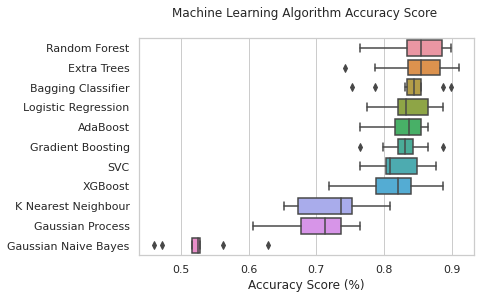

In [0]:
results = pd.DataFrame(scores).T
results['mean'] = results.mean(1)
result_df = results.sort_values(by='mean', ascending=False)
result_df.head(11)


result_df = result_df.drop(['mean'], axis=1)
sns.boxplot(data=result_df.T, orient='h')
plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)');

## Voting (Hard/Soft)

In [0]:
#튜닝한 파라미터로 하드보팅
grid_hard = VotingClassifier(estimators = [('Random Forest', ran), 
                                           ('Logistic Regression', log),
                                           ('XGBoost', xgb),
                                           ('Gradient Boosting', gbc),
                                           ('Extra Trees', ext),
                                           ('AdaBoost', ada),
                                           ('Gaussian Process', gpc),
                                           ('SVC', svc),
                                           ('K Nearest Neighbour', knn),
                                           ('Bagging Classifier', bag)], voting = 'hard')

grid_hard_cv = model_selection.cross_validate(grid_hard, X_train, y_train, cv=10)
grid_hard.fit(X_train, y_train)

print("Hard voting on test set score mean: {:.2f}". format(grid_hard_cv['test_score'].mean() * 100))

Hard voting on test set score mean: 85.19


In [0]:
grid_soft = VotingClassifier(estimators = [('Random Forest', ran), 
                                           ('Logistic Regression', log),
                                           ('XGBoost', xgb),
                                           ('Gradient Boosting', gbc),
                                           ('Extra Trees', ext),
                                           ('AdaBoost', ada),
                                           ('Gaussian Process', gpc),
                                           ('SVC', svc),
                                           ('K Nearest Neighbour', knn),
                                           ('Bagging Classifier', bag)], voting = 'soft')

grid_soft_cv = model_selection.cross_validate(grid_soft, X_train, y_train, cv=10)
grid_soft.fit(X_train, y_train)

print("Soft voting on test set score mean: {:.2f}". format(grid_soft_cv['test_score'].mean() * 100))

Soft voting on test set score mean: 84.96


## 마지막 모델 예측

In [0]:
# Final predictions
predictions = grid_soft.predict(X_test)

submission = pd.concat([pd.DataFrame(passId), pd.DataFrame(predictions)], axis = 'columns')

submission.columns = ["PassengerId", "Survived"]
submission.to_csv('titanic_submission146.csv', header = True, index = False)

In [0]:
# Final predictions2
predictions = grid_hard.predict(X_test)

submission = pd.concat([pd.DataFrame(passId), pd.DataFrame(predictions)], axis = 'columns')

submission.columns = ["PassengerId", "Survived"]
submission.to_csv('titanic_submission145.csv', header = True, index = False)

### 제출

In [0]:
# And we finally make a submission 그리고 제출 합니다.
# Please make sure you "commit" (It take a few minutes) / commit버턴을 누르시는 것을 잊지 마세요 (몇 분 걸립니다)
# And then you will see the submission file on the top right hand side at Data>Output>Kaggle/working / 그럼 우측 상단 데이터 아웃풋에서 제출용 결과물이 나올 것입니다.